# USO DE LAS ETAPAS PRIMARIAS DE LA METODOLOGIA CRISP-DM PARA EL ANALISIS DE DATOS DE LOS BIENES INMUEBLES EN LA CIUDAD DE BOGOTÁ




---








# 1. Entendimiento del negocio






## 1.1 Introdución
El mercado inmobiliario en Bogotá, capital de Colombia y una de las ciudades más importantes de América Latina, ha experimentado un crecimiento sostenido en los últimos años. Este crecimiento está impulsado por diversos factores, incluyendo la urbanización acelerada, la creciente demanda de viviendas y el desarrollo de proyectos comerciales. La ciudad ofrece una amplia gama de propiedades, desde apartamentos hasta casas y oficinas, con precios que varían significativamente según la ubicación y las características de la propiedad.

La demanda de viviendas en Bogotá ha sido históricamente alta, motivada por el crecimiento demográfico, la urbanización constante y el incremento en la población de clase media. Para abordar esta demanda, el gobierno ha implementado políticas que promueven la adquisición de viviendas, como programas de subsidios. Estas medidas han tenido un impacto positivo en el mercado inmobiliario y en el acceso a la vivienda para diversos segmentos de la población.

En este contexto, este proyecto de análisis de datos tiene como objetivo examinar y comprender el mercado inmobiliario en Bogotá. A través de un análisis detallado de datos, exploraremos tendencias en precios, preferencias de propiedad, ubicaciones más solicitadas y otros aspectos relevantes. Utilizando herramientas y técnicas de análisis de datos, buscamos proporcionar información valiosa que pueda servir como base para tomar decisiones informadas en el ámbito inmobiliario en la ciudad.



## 1.2 Objetivos de negocio y situación actual


El sector inmobiliario abarca la compra y venta de bienes inmuebles y se rige por la oferta y la demandada:
- Oferta: Bienes inmuebles promocionados en venta
- Demanda: Interes de un grupo de clientes para adquierir los bienes.

La relacion entre estas variables determina el precio de los productos, por lo que el mercado inmobiliario es altamente sensiblea a factores: politicos, economicos y sociales.

Algunos ejemplos comunes de tipos de inmuebles son:
*   Casa
*   Apartamento
*   Terreno
*   Edificios

Así mismo cada inmueble posee distintos usos, entre los cuales destacan:

*   Residencial   
*   Comercial
*   Industrial
*   Desarrollo
*   Inversión

En lo que concierne a Bogotá, la Unidad Administrativa especial de Catastro Digital (UADC), proporciona la siguiente información inmoviliaria para el año 2023:

*   Total de Inmuebles: La ciudad de Bogotá cuenta con un total de 2,776,362 inmuebles, con un valor estimado de 779.1 billones de pesos, representando un incremento del 6.8% en comparación con el año anterior.

*   Distribución Geográfica: Los nuevos predios se han concentrado de manera notable en las localidades de Suba (7,147 predios), Engativá (4,657 predios), Fontibón (4,385 predios) y Usaquén (3,764 predios)¹. Estos datos revelan patrones de desarrollo que pueden ser de gran interés estratégico.

*   Expansión de Área: Además, se han añadido 2.86 millones de metros cuadrados a la ciudad, lo que eleva el área total construida a 299 millones de metros cuadrados.

La magnitud de estos cambios en el censo inmobiliario de Bogotá es importante y subraya la necesidad de un análisis de datos detallado para comprender su impacto en el panorama urbano y económico.

















##1.3 Objetivo del proyecto

**1.3.1 Objetivo General:**


El objetivo general de este proyecto de análisis de datos es explorar el mercado inmobiliario en la ciudad de Bogotá, mediante el uso de datos relevantes, destacando tendencias y correlaciones significativas. Se hará énfasis en la visualización geoespacial para comprender la distribución espacial de las propiedades, así como en el análisis de la relación entre ubicación y precio de las mismas. El propósito es proporcionar insights valiosos y comprensibles que contribuyan a la toma de decisiones informadas para actores clave en el mercado inmobiliario de la ciudtá.




## 1.4 Planeación del proyecto

**1.3.2 Objetivos especificos:**


1.  Caracterizar los bienes inmuebles del DataFrame
2.  Identificar las tendencias geograficas presentes en los bienes inmuebles basandose en localidades o barrios.
3.  Desagregar las Características de los Inmuebles por Ubicación Geográfica
4.  Realizar un analisis de los factores que mas influyen en el precio de los inmuebles, ya sean de renta o venta.
5.  Analizar la demanda de los bienes raices en la ciudad con base en la localidad, identicando zonas de mayor demanda.

# 2. Entendimiento de los datos


## 2.1 Adquisición de los datos

Los datos utilizados en este proyecto fueron recopilados mediante un scraper que rastrea y actualiza los precios de venta de apartamentos en la base de datos. Estas bases de datos son de acceso público y están disponibles en las platadormas: Kaggle y GitHub.

* Kaggle: https://www.kaggle.com/datasets/erik172/bogota-apartments
* GitHub: https://github.com/builker-col/bogota-apartments

## 2.2 Integración de los datos

In [132]:
# Libraries
# Data processing
import pandas as pd
import numpy as np

# Data stats
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [133]:
# Read apartments database into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/builker-col/bogota-apartments/master/data/processed/apartments.csv', delimiter=',')
apt = df

## 2.3 Análisis exploratorio de los datos: caracterización de los datos

### 2.3.1 Tipos de variables

In [134]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63245 entries, 0 to 63244
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   codigo                               63245 non-null  object 
 1   tipo_propiedad                       63245 non-null  object 
 2   tipo_operacion                       63245 non-null  object 
 3   precio_venta                         44405 non-null  float64
 4   precio_arriendo                      19702 non-null  float64
 5   area                                 63243 non-null  float64
 6   habitaciones                         63237 non-null  float64
 7   banos                                63239 non-null  float64
 8   administracion                       51342 non-null  float64
 9   parqueaderos                         63237 non-null  float64
 10  sector                               60238 non-null  object 
 11  estrato                     

In [135]:
apt.describe()

,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,estrato,longitud,latitud,...,jacuzzi,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,distancia_estacion_tm_m,is_cerca_estacion_tm
count,4.440500e+04,1.970200e+04,63243.000000,63237.000000,63239.000000,5.134200e+04,63237.000000,63225.000000,63245.000000,63245.000000,...,63245.000000,35122.000000,23506.000000,63245.000000,63245.000000,63245.000000,63245.000000,63245.000000,63245.000000,63245.000000
mean,1.510209e+09,1.330095e+07,134.480490,2.591805,2.628441,3.571012e+06,1.590556,4.764302,-74.063698,4.686278,...,0.041821,9.353084,2.207649,0.331552,0.058471,0.295992,0.597312,0.389169,1293.977872,0.208048
std,3.769809e+10,3.011991e+08,752.129002,0.850579,1.165273,6.382093e+07,1.052490,1.259631,0.034651,0.039023,...,0.200183,51.754532,1.159691,0.470775,0.234634,0.456491,0.490443,0.487566,907.866126,0.405915
min,2.450000e+05,1.000000e+05,0.000000,1.000000,-3.000000,1.960000e+02,0.000000,0.000000,-74.215130,4.467270,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.810000,0.000000
25%,3.700000e+08,1.500000e+06,62.000000,2.000000,2.000000,3.000000e+05,1.000000,4.000000,-74.069000,4.661987,...,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,575.050000,0.000000
50%,6.100000e+08,2.900000e+06,94.000000,3.000000,2.000000,5.490000e+05,2.000000,5.000000,-74.052160,4.690000,...,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1187.830000,0.000000
75%,1.185000e+09,6.000000e+06,160.000000,3.000000,3.000000,1.000000e+06,2.000000,6.000000,-74.043390,4.714606,...,0.000000,6.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1734.270000,0.000000
max,4.250000e+12,2.550000e+10,113000.000000,8.000000,5.000000,3.800000e+09,4.000000,6.000000,-74.014000,4.821250,...,1.000000,2013.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9968.980000,1.000000


Se toman 5 registros a azar para conocer las distribución de la columnas. De tal manera, que se pueda obtener una percepción general de los datos.

In [136]:
apt.sample(5)

,codigo,tipo_propiedad,tipo_operacion,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,...,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm
44099,2456-M3061014,APARTAMENTO,VENTA,5.600000e+08,NaN,143.0,2.0,2.0,320000.0,2.0,...,0,1,1,1,False,SUBA,URB. LA SIRENA,Mazuren,1590.26,0
1981,22-M4166623,APARTAMENTO,VENTA,9.500000e+08,NaN,220.0,3.0,4.0,1370000.0,1.0,...,0,0,1,1,False,USAQUEN,SANTA BARBARA CENTRAL II SECTOR,Pepe Sierra,1804.76,0
33635,920-M4212008,APARTAMENTO,VENTA,7.800000e+08,NaN,145.0,3.0,2.0,1200000.0,1.0,...,0,0,1,0,False,CHAPINERO,S.C. EL NOGAL,Calle 76,1251.65,0
37553,533-M4477306,APARTAMENTO,VENTA,1.100000e+09,NaN,138.0,3.0,4.0,700000.0,2.0,...,0,1,1,1,False,FONTIBON,LA ESPERANZA NORTE,Avenida Rojas,556.11,0
608,770-M3192821,APARTAMENTO,VENTA,1.050000e+09,NaN,179.0,3.0,3.0,740000.0,2.0,...,0,0,1,1,False,USAQUEN,ESCUELA DE INFANTERIA,Calle 106,1759.43,0


Tambien se quiere conocer el numero de registro y la cantidad de columnas asociadas a estos

In [137]:
apt.shape

(63245, 38)

Tambien es necessario conocer todas las variables de los datos

In [138]:
apt.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'precio_arriendo', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'estado', 'longitud',
       'latitud', 'descripcion', 'datetime', 'website', 'compañia',
       'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm'],
      dtype='object')

Se muestra una tabla resumen de las variables de el dataframe


| Columna                              | Descripción                                               |
|--------------------------------------|-----------------------------------------------------------|
| codigo                               | Código único que identifica cada apartamento              |
| tipo_propiedad                       | Tipo de propiedad (apartamento, casa, etc.)               |
| tipo_operacion                       | Tipo de operación (venta, arriendo, etc.)                 |
| precio_venta                         | Precio de venta del apartamento COP                       |
| precio_arriendo                      | Precio de arriendo del apartamento COP                    |
| area                                 | Área del apartamento en metros cuadrados                  |
| habitaciones                         | Número de habitaciones del apartamento                    |
| banos                                | Número de baños del apartamento                           |
| administracion                       | Valor de la cuota de administración del apartamento       |
| parqueaderos                         | Número de parqueaderos disponibles                        |
| sector                               | Sector o zona en la que se encuentra el apartamento       |
| estrato                              | Estrato socioeconómico del apartamento                    |
| antiguedad                           | Antigüedad del apartamento en años                        |
| estado                               | Estado del apartamento (nuevo, usado)                     |
| longitud                             | Longitud geográfica del apartamento                       |
| latitud                              | Latitud geográfica del apartamento                        |
| descripcion                          | Descripción detallada del apartamento                     |
| datetime                             | Fecha y hora de extracción de los datos                   |
| jacuzzi                              | Indica si el apartamento cuenta con jacuzzi               |
| piso                                 | Número de piso en el que se encuentra el apartamento      |
| closets                              | Número de closets en el apartamento                       |
| chimenea                             | Indica si el apartamento cuenta con chimenea              |
| permite_mascotas                     | Indica si se permiten mascotas en el apartamento          |
| gimnasio                             | Indica si el apartamento cuenta con gimnasio              |
| ascensor                             | Indica si el edificio cuenta con ascensor                 |
| conjunto_cerrado                     | Indica si el apartamento se encuentra en conjunto cerrado |
| coords_modified                      | Coordenadas modificadas del apartamento                   |
| localidad                            | Localidad en la que se encuentra el apartamento           |
| barrio                               | Barrio en el que se encuentra el apartamento              |
| estacion_tm_cercana                  | Nombre de la estacion de transporte masivo mas cercana    |
| distancia_estacion_tm_m              | Distancia a la estación de transporte masivo más cercana  |
| is_cerca_estacion_tm                    | Indica si está cerca de una estación de transporte masivo |
| website                              | Sitio web relacionado a la propiedad                      |
| compañia                             | Compañía o agencia responsable de la propiedad            |
| fecha_actualizacion_precio_venta     | Fecha de actualización del precio de venta (scrapeado)    |
| precio_venta_anterior                | Precio de venta anterior de la propiedad COP              |
| fecha_actualizacion_precio_arriendo  | Fecha de actualización del precio de arriendo (scrapeado) |
| precio_arriendo_anterior             | Precio de arriendo anterior de la propiedad COP           |

### 2.3.2 Variables con valores faltanes

In [139]:
conteo_nan_por_columna = apt.isna().sum()

# Si deseas contar los NaN y expresarlos como porcentaje en lugar de número absoluto:
porcentaje_nan_por_columna = (apt.isna().mean() * 100).round(2)

# Crear un nuevo DataFrame o serie para mostrar los resultados
resultado = pd.DataFrame({'Total de NaN': conteo_nan_por_columna, 'Porcentaje de NaN': porcentaje_nan_por_columna})
#resultado = resultado['Total de NaN'].sort_values(ascending = False)
resultado_1 = resultado['Total de NaN'].sort_values(ascending = False)
# Mostrar el resultado
print(resultado_1)

precio_arriendo_anterior               61374
precio_venta_anterior                  61354
fecha_actualizacion_precio_arriendo    61351
fecha_actualizacion_precio_venta       61316
precio_arriendo                        43543
closets                                39739
piso                                   28123
precio_venta                           18840
compañia                               12668
administracion                         11903
sector                                  3007
estado                                  1144
barrio                                   313
antiguedad                                28
estrato                                   20
descripcion                                9
parqueaderos                               8
habitaciones                               8
banos                                      6
area                                       2
ascensor                                   0
estacion_tm_cercana                        0
conjunto_c

### 2.3.3 Variables categoricas y numéricas

Se realiza una clasifiación de las variables en:
* Variables numericas
* Variables categóricas

In [140]:
# Numeric variables
var_numeric = (['precio_venta',
                'precio_arriendo',
                'area',
                'habitaciones',
                'banos',
                'administracion',
                'parqueaderos',
                'longitud',
                'latitud',
                'fechas',
                'precio_arriendo_anterior',
                'piso',
                'closets',
                'distancia_estacion_tm_m'])

In [141]:
# Categorical variables
var_categorical = (['codigo',
                    'tipo_propiedad',
                    'tipo_operacion',
                    'sector',
                    'estrato',
                    'antiguedad',
                    'estado',
                    'descripcion',
                    'datetime',
                    'website',
                    'compañia',
                    'jacuzzi',
                    'closets',
                    'chimenea',
                    'permite_mascotas',
                    'gimnasio',
                    'ascensor',
                    'conjunto_cerrado',
                    'coords_modified',
                    'localidad',
                    'barrio',
                    'estacion_tm_cercana',
                    'is_cerca_estacion_tm'])

### 2.3.4 Exploración de los datos

Se precisa ver los valores mas frecuentes en algunas de las mas importantes variables categoricas

In [142]:
estrato = (
    apt
    .estrato
    .value_counts()
)
estrato

6.0    25949
4.0    13540
5.0    11592
3.0     9405
2.0     2495
1.0      204
0.0       40
Name: estrato, dtype: int64

<Axes: xlabel='estrato', ylabel='count'>

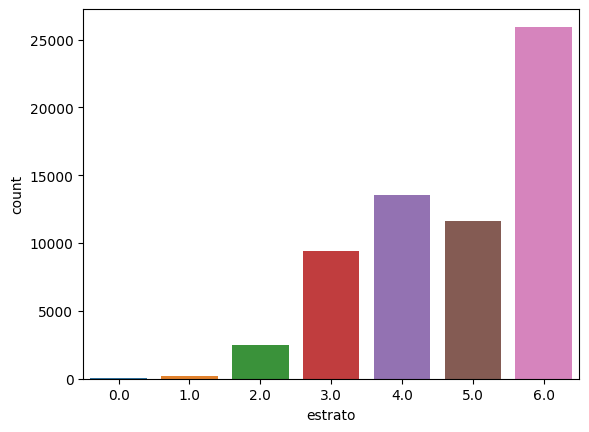

In [143]:
sns.countplot(x = 'estrato', data = apt)

In [144]:
operacion = (
    apt
    .tipo_operacion
    .value_counts()
)
operacion

VENTA               43755
ARRIENDO            19075
VENTA Y ARRIENDO      415
Name: tipo_operacion, dtype: int64

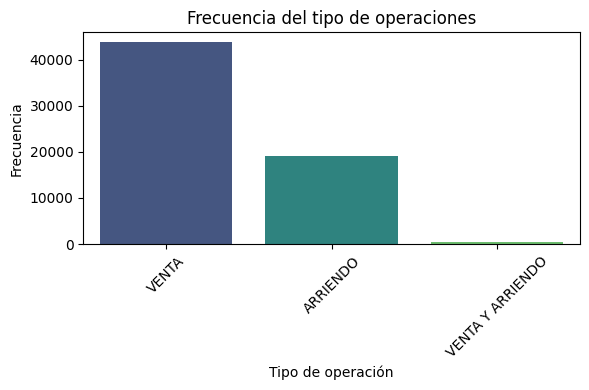

In [145]:
# Contar la operaciones frecuentes de cada localidad
operacion = (
    apt
    .tipo_operacion
    .value_counts()
)

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=operacion.index, y=operacion.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Tipo de operación')
plt.ylabel('Frecuencia')
plt.title('Frecuencia del tipo de operaciones')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [146]:
venta_localidad = (
    apt
    .query("tipo_operacion == 'VENTA' or tipo_operacion == 'VENTA O ARRIENDO'")
    .localidad
    .value_counts()
)
venta_localidad

USAQUEN               16477
CHAPINERO             10868
SUBA                   7837
KENNEDY                1681
FONTIBON               1521
ENGATIVA               1291
TEUSAQUILLO            1193
SANTA FE                630
BOSA                    564
BARRIOS UNIDOS          471
CIUDAD BOLIVAR          263
PUENTE ARANDA           252
LOS MARTIRES            187
USME                    133
RAFAEL URIBE URIBE      117
CANDELARIA               89
ANTONIO NARINO           72
SAN CRISTOBAL            69
TUNJUELITO               40
Name: localidad, dtype: int64

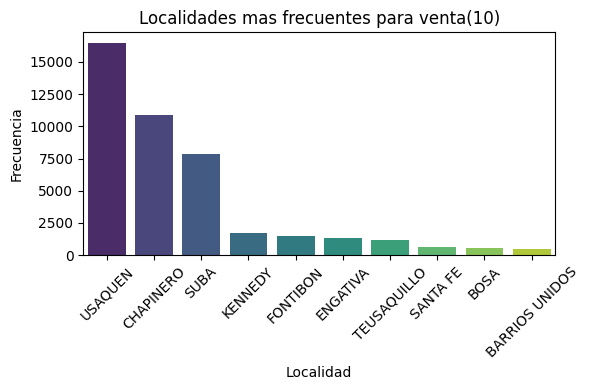

In [147]:
# Localidades mas frecuentes para venta
venta_localidad = (
    apt
    .query("tipo_operacion == 'VENTA' or tipo_operacion == 'VENTA O ARRIENDO'")
    .localidad
    .value_counts()
)
# Contar la frecuencia de cada localidad
venta_localidad = venta_localidad.head(10)

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=venta_localidad.index, y=venta_localidad.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Localidad')
plt.ylabel('Frecuencia')
plt.title('Localidades mas frecuentes para venta(10)')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



In [148]:
arriendo_localidad = (
    apt
    .query("tipo_operacion == 'ARRIENDO' or tipo_operacion == 'VENTA O ARRIENDO'")
    .localidad
    .value_counts()
)
arriendo_localidad

CHAPINERO             6115
USAQUEN               5868
SUBA                  2247
ENGATIVA               710
KENNEDY                664
FONTIBON               641
TEUSAQUILLO            618
SANTA FE               541
PUENTE ARANDA          410
BARRIOS UNIDOS         348
BOSA                   162
LOS MARTIRES           156
CIUDAD BOLIVAR         153
RAFAEL URIBE URIBE     127
CANDELARIA              87
SAN CRISTOBAL           86
ANTONIO NARINO          81
TUNJUELITO              43
USME                    18
Name: localidad, dtype: int64

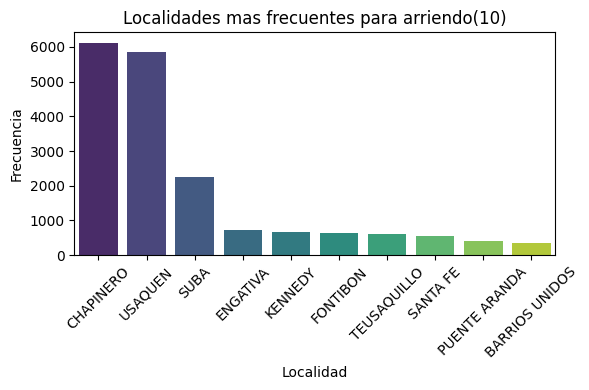

In [149]:
# Localidades mas frecuentes para arriendo
arriendo_localidad = (
    apt
    .query("tipo_operacion == 'ARRIENDO' or tipo_operacion == 'VENTA O ARRIENDO'")
    .localidad
    .value_counts()
)
# Seleccion de las 10 localidades mas frecuentes
arriendo_localidad = arriendo_localidad.head(10)
# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=arriendo_localidad.index, y=arriendo_localidad.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Localidad')
plt.ylabel('Frecuencia')
plt.title('Localidades mas frecuentes para arriendo(10)')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



In [150]:
sector = (
    apt
    .sector
    .value_counts()
)
sector

CHICO                   13653
SANTA BARBARA           10577
COUNTRY                  5372
COLINA Y ALREDEDORES     4518
CEDRITOS                 4025
                        ...  
RESTREPO                    1
VENECIA                     1
SAN RAFAEL                  1
LOS ALCAZARES               1
TEUSAQUILLO                 1
Name: sector, Length: 102, dtype: int64

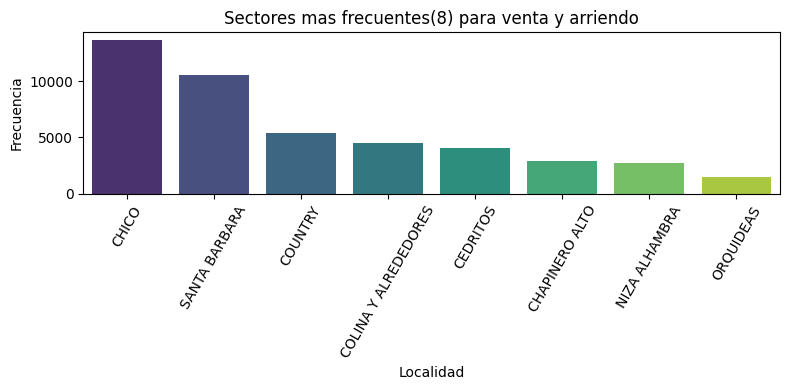

In [151]:
# Sectores mas frecuentes
sector = (
    apt
    .sector
    .value_counts()
)
# Seleccion de las 10 localidades mas frecuentes
sector  = sector.head(8)
# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(8, 4))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=sector.index, y=sector.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Localidad')
plt.ylabel('Frecuencia')
plt.title('Sectores mas frecuentes(8) para venta y arriendo')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=60)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [152]:
antiguedad = (
    apt
    .antiguedad
    .value_counts()
)
antiguedad

MAS DE 20 ANOS        21452
ENTRE 10 Y 20 ANOS    16312
ENTRE 0 Y 5 ANOS      11769
ENTRE 5 Y 10 ANOS     11419
REMODELADO             2265
Name: antiguedad, dtype: int64

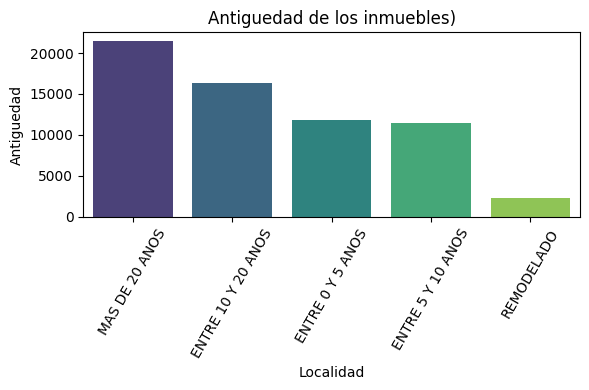

In [153]:
# Frecuencia de antiguedad en la totalidad de los inmuebles
antiguedad = (
    apt
    .antiguedad
    .value_counts()
)
# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=antiguedad.index, y=antiguedad.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Localidad')
plt.ylabel('Antiguedad')
plt.title('Antiguedad de los inmuebles)')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=60)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [154]:
compania = (
    apt
    .compañia
    .value_counts()
)
compania

ENGEL & VOLKERS                 1113
INMOBILIARIA BOGOTA             1093
JULIO CORREDOR Y CIA. LTDA.     1043
HOUM                             949
PADS                             949
                                ... 
INMOBILIARIA ALFA FINCA RAIZ       1
CENTRO EMPRESARIAL UNICENTRO       1
CASA LUBER INMOBILIARIA            1
GESTIONES AL CUADRADO              1
DIANA HELENA ESPINOSA MADRID       1
Name: compañia, Length: 807, dtype: int64

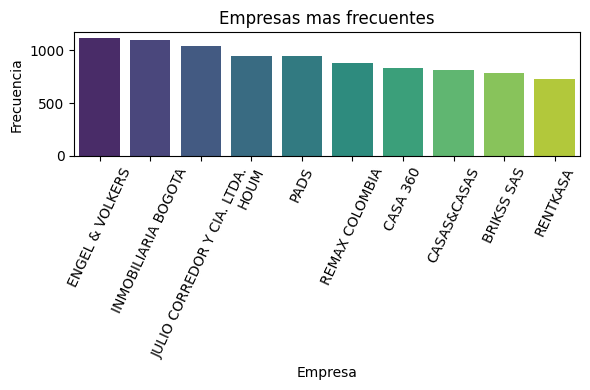

In [155]:
# Frecuencia de antiguedad en la totalidad de los inmuebles
compania = (
    apt
    .compañia
    .value_counts()
)
# Seleccion de las 10 localidades mas frecuentes
compania  = compania.head(10)
# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=compania.index, y=compania.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Empresa')
plt.ylabel('Frecuencia')
plt.title('Empresas mas frecuentes')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=65)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [156]:
tipo = (
    apt
    .tipo_propiedad
    .value_counts()
)
tipo

APARTAMENTO                  63139
CASA CON CONJUNTO CERRADO       79
CASA                            27
Name: tipo_propiedad, dtype: int64

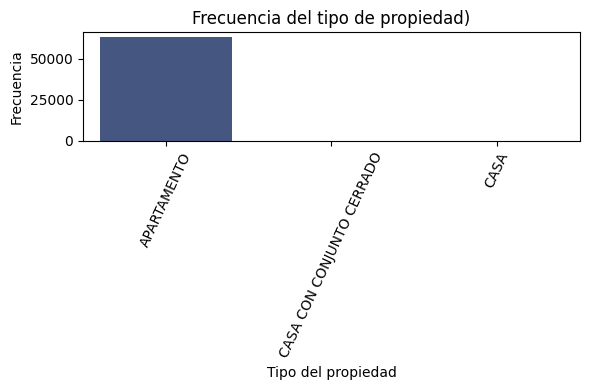

In [157]:
# Frecuencia de antiguedad en la totalidad de los inmuebles
tipo = (
    apt
    .tipo_propiedad
    .value_counts()
)
# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=tipo.index, y=tipo.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Tipo del propiedad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia del tipo de propiedad)')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=65)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## 2.4 Análisis exploratorio de datos: descripción con estadistica descriptiva

Como se plantea desde un inicio el objetivo del proyecto se enfoca en la visualización geoespacial para comprender la distribución espacial de los inmuebles y su relación con el valor inmobiliario. Por esta razon, se agrupan los inmuebles por localidad y se analizan variables numericas relevantes.

### 2.4.1 Medidas de posición

In [158]:
# PRECIO VENTA
precio_venta_pos = (
    apt
    .query("tipo_operacion == 'VENTA' or tipo_operacion == 'VENTA O ARRIENDO'")
    .groupby('localidad')
    .agg({
        'precio_venta': ['mean',
                         'median',
                         lambda x: x.quantile(0.25),
                         lambda x: x.quantile(0.75),]})
)

# Format data as money
precio_venta_pos = (
    precio_venta_pos
    .applymap(lambda x:'${:,.2f}'.format(x))
)

# Change column names
precio_venta_pos.columns = ('promedio', 'mediana', 'percentil 25', 'percentil 75')

precio_venta_pos.sort_values(by='promedio', ascending=False)

,promedio,mediana,percentil 25,percentil 75
localidad,,,,
SUBA,"$591,987,835.29","$470,000,000.00","$321,200,000.00","$690,000,000.00"
TEUSAQUILLO,"$565,432,837.79","$520,000,000.00","$400,000,000.00","$650,000,000.00"
CANDELARIA,"$540,971,548.42","$400,000,000.00","$270,000,000.00","$490,000,000.00"
BARRIOS UNIDOS,"$508,897,523.24","$460,000,000.00","$368,999,999.50","$550,000,000.00"
FONTIBON,"$481,779,442.36","$390,431,000.00","$250,000,000.00","$559,000,000.00"
PUENTE ARANDA,"$368,460,908.73","$350,000,000.00","$230,000,000.00","$450,000,000.00"
ANTONIO NARINO,"$323,473,611.11","$260,000,000.00","$223,750,000.00","$330,000,000.00"
ENGATIVA,"$311,125,629.63","$280,000,000.00","$228,000,000.00","$349,500,000.00"
TUNJUELITO,"$300,575,000.00","$222,500,000.00","$175,000,000.00","$265,000,000.00"


In [159]:
# PRECIO ARRIENDO
precio_arriendo_pos = (
    apt
    .query("tipo_operacion == 'ARRIENDO'")
    .groupby('localidad')
    .agg({
        'precio_venta': ['mean',
                         'median',
                         lambda x: x.quantile(0.25),
                         lambda x: x.quantile(0.75),]})
)

# Format data as money
precio_arriendo_pos = (
    precio_arriendo_pos
    .applymap(lambda x:'${:,.2f}'.format(x))
)

# Change column names
precio_arriendo_pos.columns = ('promedio', 'mediana', 'percentil 25', 'percentil 75')

precio_arriendo_pos.sort_values(by='promedio', ascending=False)

,promedio,mediana,percentil 25,percentil 75
localidad,,,,
ANTONIO NARINO,$nan,$nan,$nan,$nan
CIUDAD BOLIVAR,$nan,$nan,$nan,$nan
SAN CRISTOBAL,$nan,$nan,$nan,$nan
RAFAEL URIBE URIBE,$nan,$nan,$nan,$nan
LOS MARTIRES,$nan,$nan,$nan,$nan
CANDELARIA,$nan,$nan,$nan,$nan
USME,$nan,$nan,$nan,$nan
ENGATIVA,"$85,392,727.27","$1,200,000.00","$800,000.00","$1,525,000.00"
SANTA FE,"$826,350,000.00","$826,350,000.00","$414,525,000.00","$1,238,175,000.00"


*NOTA: SE OBSERVA QUE SE ENCUENTRA DATOS FALTANTES PARA ALGUNAS DE LAS LOCALIDADES. SE DEBE TENER MUY ENCUENTA PARA LIMPIAR LOS DATOS*

In [160]:
# AREA VENTA
area_venta_pos = (
    apt
    .query("tipo_operacion == 'VENTA' or tipo_operacion == 'VENTA O ARRIENDO'")
    .groupby('localidad')
    .agg({
        'area': ['mean',
                         'median',
                         lambda x: x.quantile(0.25),
                         lambda x: x.quantile(0.75),]})
)

# Change column names
area_venta_pos.columns = ('promedio', 'mediana', 'percentil 25', 'percentil 75')

area_venta_pos.sort_values(by='promedio', ascending=False)

,promedio,mediana,percentil 25,percentil 75
localidad,,,,
CHAPINERO,191.556459,165.00,102.085,242.0000
TEUSAQUILLO,186.942666,89.00,64.000,112.0000
USAQUEN,142.176216,113.00,79.000,172.0000
FONTIBON,136.387212,68.44,55.000,87.0000
SUBA,109.215011,87.18,67.000,122.0000
KENNEDY,105.898334,55.00,47.000,67.0000
BARRIOS UNIDOS,90.003758,82.00,64.000,103.0000
SANTA FE,77.906349,55.00,45.000,86.5000
PUENTE ARANDA,71.724405,66.10,53.255,78.2250


In [161]:
# AREA ARRIENDO
area_venta_pos = (
    apt
    .query("tipo_operacion == 'ARRIENDO'")
    .groupby('localidad')
    .agg({
        'area': ['mean',
                         'median',
                         lambda x: x.quantile(0.25),
                         lambda x: x.quantile(0.75),]})
)

# Change column names
area_venta_pos.columns = ('promedio', 'mediana', 'percentil 25', 'percentil 75')

area_venta_pos.sort_values(by='promedio', ascending=False)

,promedio,mediana,percentil 25,percentil 75
localidad,,,,
SANTA FE,200.254122,40.000,28.000,64.000
CHAPINERO,157.756444,128.270,70.000,212.000
USAQUEN,121.010999,90.000,62.000,150.000
TUNJUELITO,99.745581,51.000,47.000,58.500
SUBA,86.681424,69.970,52.000,100.000
BARRIOS UNIDOS,73.276782,62.500,45.000,90.000
ENGATIVA,68.873268,57.205,48.000,70.000
FONTIBON,65.055039,56.000,45.000,72.000
PUENTE ARANDA,64.171732,60.000,47.000,79.750


### 2.4.2 Medidas de forma

In [162]:
# FORMA VENTA
precio_venta_for = (
    apt
    .query("tipo_operacion == 'VENTA' or tipo_operacion == 'VENTA O ARRIENDO'")
    .groupby('localidad')
    .agg({
        'precio_venta': [
            lambda x: x.kurtosis(),
            lambda x: x.skew(),
        ]
        })
)

# Change column names
precio_venta_for.columns = ('curtosis', 'asimetria',)

precio_venta_for.sort_values(by='curtosis', ascending=False)

,curtosis,asimetria
localidad,,
USAQUEN,5498.606500,72.501466
CHAPINERO,2209.561370,45.368644
SANTA FE,629.543675,25.086287
BOSA,563.999172,23.748658
KENNEDY,97.516548,5.481665
ANTONIO NARINO,61.549967,7.579317
ENGATIVA,59.513326,5.837118
TEUSAQUILLO,50.212537,4.617949
CANDELARIA,45.725952,6.302717


In [163]:
# FORMA ARRIENDO
precio_venta_for = (
    apt
    .query("tipo_operacion == 'ARRIENDO'")
    .groupby('localidad')
    .agg({
        'precio_venta': [
            lambda x: x.kurtosis(),
            lambda x: x.skew(),
        ]
        })
)

# Change column names
precio_venta_for.columns = ('curtosis', 'asimetria',)

precio_venta_for.sort_values(by='curtosis', ascending=False)

,curtosis,asimetria
localidad,,
USAQUEN,16.854851,3.521459
SUBA,14.952775,3.430719
ENGATIVA,8.671118,2.909085
CHAPINERO,3.988002,1.801141
TEUSAQUILLO,0.979009,1.041774
KENNEDY,-2.278682,-0.038397
ANTONIO NARINO,NaN,NaN
BARRIOS UNIDOS,NaN,NaN
BOSA,NaN,NaN


### 2.4.3 Medidas de disperción

In [164]:
# VENTAS DISPERCION
precio_venta_dis = (
    apt
    .query("tipo_operacion == 'VENTA' or tipo_operacion == 'VENTA O ARRIENDO'")
    .groupby('localidad')
    .agg({
        'precio_venta': ['std',
                         'var',
                         'min',
                         'max',]
    })
)

# Format data as money
precio_venta_dis = (
    precio_venta_dis
    .applymap(lambda x:'${:,.2f}'.format(x))
)

# Change column names
precio_venta_dis.columns = ('desviacion estandar', 'varianza', 'min', 'max')

precio_venta_dis.sort_values(by='desviacion estandar', ascending=False)

,desviacion estandar,varianza,min,max
localidad,,,,
BOSA,"$83,704,062,398.93","$7,006,370,062,083,287,941,120.00","$95,200,000.00","$1,988,000,000,000.00"
CANDELARIA,"$733,422,434.92","$537,908,468,047,700,608.00","$108,000,000.00","$6,300,000,000.00"
CHAPINERO,"$69,751,955,870.98","$4,865,335,347,827,023,282,176.00","$1,100,000.00","$4,250,000,000,000.00"
SAN CRISTOBAL,"$57,114,211.98","$3,262,033,209,718,671.00","$110,000,000.00","$350,000,000.00"
SUBA,"$460,390,682.71","$211,959,580,724,281,504.00","$1,100,000.00","$7,200,000,000.00"
CIUDAD BOLIVAR,"$40,033,836.84","$1,602,708,092,237,535.75","$114,000,000.00","$399,000,000.00"
FONTIBON,"$371,617,395.17","$138,099,488,389,326,928.00","$2,650,000.00","$3,500,000,000.00"
SANTA FE,"$36,838,100,555.08","$1,357,045,652,506,183,204,864.00","$100,400,000.00","$925,000,000,000.00"
ANTONIO NARINO,"$344,506,588.58","$118,684,789,575,508,592.00","$140,000,000.00","$3,100,000,000.00"


In [165]:
x = (
    apt
    .query("precio_venta == 4250000000000.00")
)
x

,codigo,tipo_propiedad,tipo_operacion,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,...,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm
48284,3252-M4269122,APARTAMENTO,VENTA,4.250000e+12,NaN,300.0,3.0,4.0,1700000.0,4.0,...,0,1,1,1,False,CHAPINERO,LOS ROSALES,Calle 72,1422.01,0


In [166]:
# DISPERCION ARRIENDO
precio_arriendo_dis = (
    apt
    .query("tipo_operacion == 'ARRIENDO'")
    .groupby('localidad')
    .agg({
        'precio_venta': ['std',
                         'var',
                         'min',
                         'max',]
    })
)

# Format data as money
precio_arriendo_dis = (
    precio_arriendo_dis
    .applymap(lambda x:'${:,.2f}'.format(x))
)

# Change column names
precio_arriendo_dis.columns = ('desviacion estandar', 'varianza', 'min', 'max')

precio_arriendo_dis.sort_values(by='desviacion estandar', ascending=False)

,desviacion estandar,varianza,min,max
localidad,,,,
ANTONIO NARINO,$nan,$nan,$nan,$nan
PUENTE ARANDA,$nan,$nan,"$220,000,000.00","$220,000,000.00"
TUNJUELITO,$nan,$nan,"$130,000,000.00","$130,000,000.00"
SAN CRISTOBAL,$nan,$nan,$nan,$nan
RAFAEL URIBE URIBE,$nan,$nan,$nan,$nan
LOS MARTIRES,$nan,$nan,$nan,$nan
CIUDAD BOLIVAR,$nan,$nan,$nan,$nan
CANDELARIA,$nan,$nan,$nan,$nan
BOSA,$nan,$nan,"$145,400,000.00","$145,400,000.00"


In [167]:
# AREAS VENTA
area_venta_dis = (
    apt
    .query("tipo_operacion == 'VENTA' or tipo_operacion == 'VENTA O ARRIENDO'")
    .groupby('localidad')
    .agg({
        'area': ['std',
                         'var',
                         'min',
                         'max',]
    })
)


# Change column names
area_venta_dis.columns = ('desviacion estandar', 'varianza', 'min', 'max')

area_venta_dis.sort_values(by='desviacion estandar', ascending=False)

,desviacion estandar,varianza,min,max
localidad,,,,
TEUSAQUILLO,3269.208244,1.068772e+07,0.0,113000.00
KENNEDY,1974.635625,3.899186e+06,0.0,81015.00
FONTIBON,1973.370391,3.894191e+06,0.0,76645.00
CHAPINERO,443.997637,1.971339e+05,0.0,28890.00
USAQUEN,297.083376,8.825853e+04,0.0,19621.00
SUBA,176.689294,3.121911e+04,0.0,9242.00
SANTA FE,127.485467,1.625254e+04,0.0,2830.00
CANDELARIA,64.072071,4.105230e+03,22.0,507.85
BARRIOS UNIDOS,42.855715,1.836612e+03,0.0,404.00


In [168]:
# AREAS ARRIENDO
area_arriendo_dis = (
    apt
    .query("tipo_operacion == 'ARRIENDO'")
    .groupby('localidad')
    .agg({
        'area': ['std',
                 'var',
                 'min',
                 'max',]
    })
)


# Change column names
area_arriendo_dis.columns = ('desviacion estandar', 'varianza', 'min', 'max')

area_arriendo_dis.sort_values(by='desviacion estandar', ascending=False)

,desviacion estandar,varianza,min,max
localidad,,,,
SANTA FE,3351.423022,1.123204e+07,15.0,78000.0
TUNJUELITO,254.186614,6.461083e+04,25.0,1700.0
CHAPINERO,248.178823,6.159273e+04,0.0,17640.0
ENGATIVA,169.749260,2.881481e+04,0.0,4500.0
USAQUEN,145.400525,2.114131e+04,0.0,9000.0
CANDELARIA,83.410708,6.957346e+03,20.0,700.0
SUBA,63.608650,4.046060e+03,0.0,487.0
TEUSAQUILLO,63.236482,3.998853e+03,0.0,1200.0
BARRIOS UNIDOS,44.722088,2.000065e+03,1.0,300.0


## 2.5 Análisis exploratorio de datos: visualizacion de datos estadisticos

### 2.5.1 Visualización exploratoria

<Axes: xlabel='estrato', ylabel='count'>

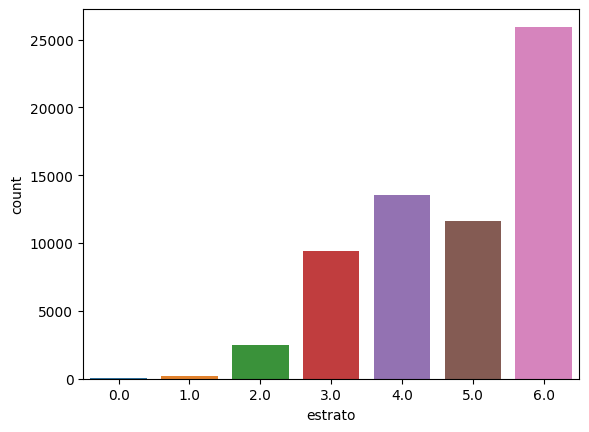

In [169]:
sns.countplot(x = 'estrato', data = apt)

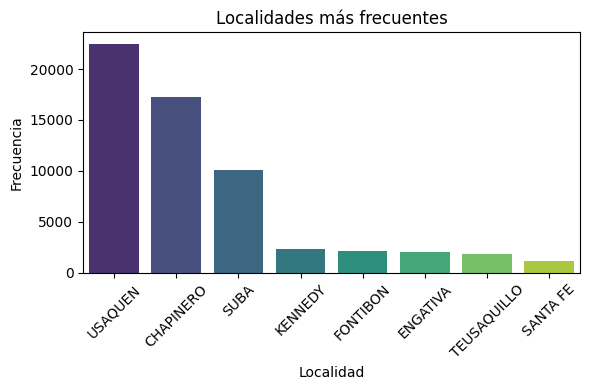

In [170]:
# Contar la frecuencia de cada localidad
localidades_frecuentes = apt['localidad'].value_counts().head(8)

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=localidades_frecuentes.index, y=localidades_frecuentes.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Localidad')
plt.ylabel('Frecuencia')
plt.title('Localidades más frecuentes')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



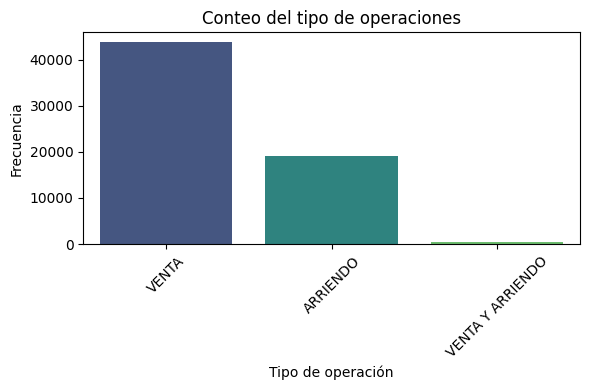

In [171]:
# Contar la frecuencia de cada localidad
localidades_frecuentes = apt['tipo_operacion'].value_counts()

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=localidades_frecuentes.index, y=localidades_frecuentes.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Tipo de operación')
plt.ylabel('Frecuencia')
plt.title('Conteo del tipo de operaciones')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


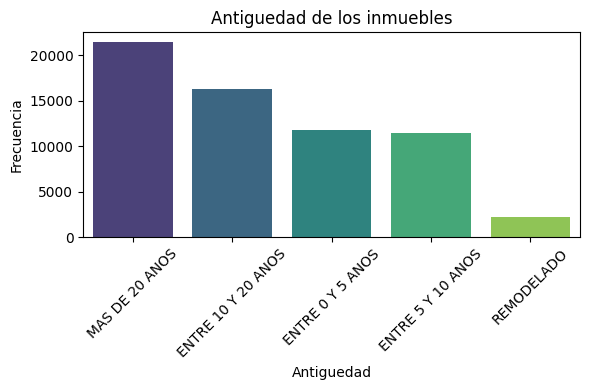

In [172]:
# Contar la frecuencia de cada localidad
localidades_frecuentes = apt['antiguedad'].value_counts().head(8)

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=localidades_frecuentes.index, y=localidades_frecuentes.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Antiguedad')
plt.ylabel('Frecuencia')
plt.title('Antiguedad de los inmuebles')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

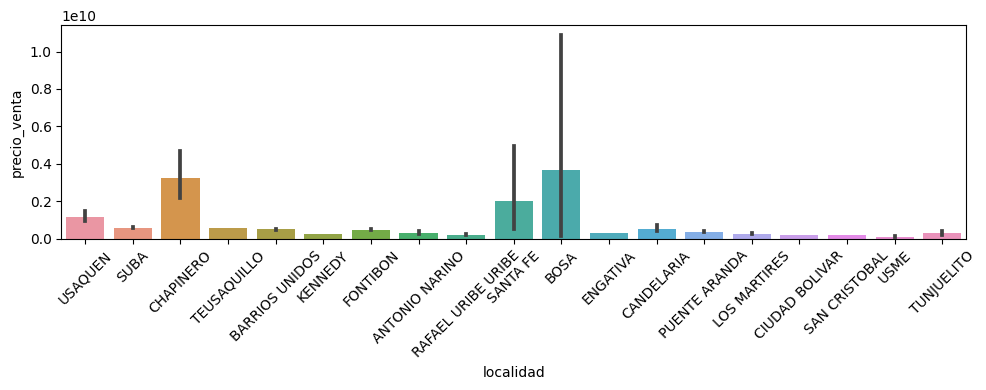

In [173]:
#sns.lmplot(x='localidad', y='precio_venta', data=apt);
plt.figure(figsize=(10, 4))
sns.barplot(x='localidad',
            y='precio_venta',
            data=apt);
# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<Axes: xlabel='precio_venta', ylabel='area'>

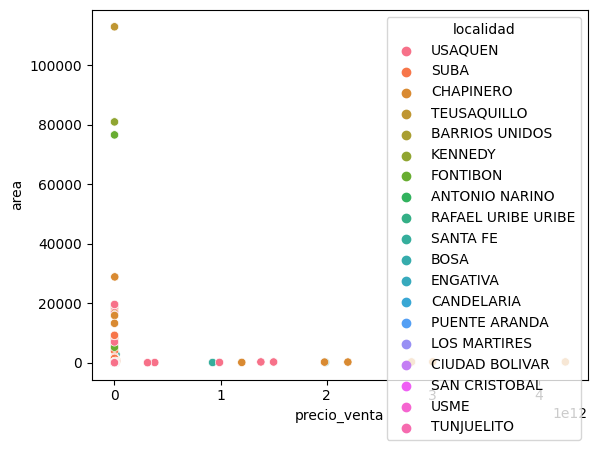

In [174]:
sns.scatterplot(data=apt,
                x='precio_venta',
                y='area',
                hue='localidad',)


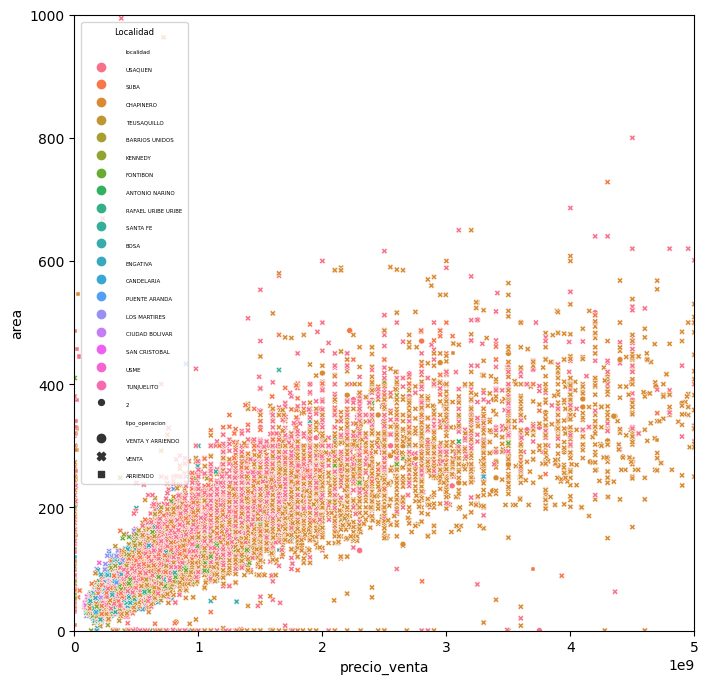

In [175]:
plt.figure(figsize=(8, 8))
fig = sns.scatterplot(data=apt,
                x='precio_venta',
                y='area',
                size=2,
                style='tipo_operacion',
                hue='localidad',)

fig.set_xlim([0, 5000000000])
fig.set_ylim([0, 1000])

legend = plt.legend(title='Localidad')
legend.get_title().set_fontsize(6)
for item in legend.texts:
    item.set_fontsize(4)

## 2.6 Conclusiones

Durante el proceso de comprensión de los datos recopilados, se identificaron contribuciones sustanciales que adquirirán una relevancia significativa en las fases subsiguientes del desarrollo del proyecto. Las aportaciones destacadas se detallan a continuación:
* Las variables numéricas de mayor relevancia para este análisis son el precio de venta o arriendo y el área. En consecuencia, se llevaron a cabo agrupaciones basadas en estas variables numéricas en función de las categorías deseadas.
* Se observa 20 variables que tienen al menos 1 valor nulo. De las cuales 10 de ellas poseen mas de 10.000 valores nulos, estan son: precio_arriendo_anterior, precio_venta_anterior, fecha_actualizacion_precio_arriendo, fecha_actualizacion_precio_venta, precio_arriendo, closets, piso, precio_venta, compañia, administracióñ.
* Se observa gran dispeción de los datos en algunas localidades: Bosa, Santa Fe, Chapinero, Usaquen, Candelaria, Tunjuelito, entre otras.
* Al observar las medidas de dispercíon, podemos ver que algunas localidades cuenta con outliers pues hay algunos predios que llegan a costar hasta 4 billones de pesos.

# 3. Preparación de los datos

## 3.1 Limpieza del conjunto de datos

### 3.1.1 Limpieza de valores nulos

Se limpian las columnas de variables que no son necesarias para el desarrolo del análisis planteado en el proyecto


In [176]:
apt.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'precio_arriendo', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'estado', 'longitud',
       'latitud', 'descripcion', 'datetime', 'website', 'compañia',
       'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm'],
      dtype='object')

In [177]:
col_to_clean = ['precio_arriendo_anterior',
                'precio_venta_anterior',
                'fecha_actualizacion_precio_venta',
                'fecha_actualizacion_precio_arriendo',
                'descripcion',
                'datetime',
                'website',
                'compañia',
                'permite_mascotas',
                'estacion_tm_cercana',
                'closets',
                'banos',]

In [178]:
apt_cleaned = (
    apt
    .drop(col_to_clean, axis=1)
)
apt_cleaned.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'precio_arriendo', 'area', 'habitaciones', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'estado', 'longitud',
       'latitud', 'jacuzzi', 'piso', 'chimenea', 'gimnasio', 'ascensor',
       'conjunto_cerrado', 'coords_modified', 'localidad', 'barrio',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm'],
      dtype='object')

En este punto, se separa los datos en dos dataframes:
1. Venta
2. Arriendo

In [179]:
df_ventas = (
    apt_cleaned
    .query('tipo_operacion == "VENTA" or tipo_operacion == "VENTA Y ARRIENDO"')
)
df_ventas.isna().sum()

codigo                         0
tipo_propiedad                 0
tipo_operacion                 0
precio_venta                   0
precio_arriendo            43543
area                           1
habitaciones                   2
administracion              4341
parqueaderos                   4
sector                      1871
estrato                       17
antiguedad                    25
estado                      1144
longitud                       0
latitud                        0
jacuzzi                        0
piso                       18020
chimenea                       0
gimnasio                       0
ascensor                       0
conjunto_cerrado               0
coords_modified                0
localidad                      0
barrio                       243
distancia_estacion_tm_m        0
is_cerca_estacion_tm           0
dtype: int64

In [180]:
df_ventas = (
    df_ventas
    .drop(['precio_arriendo',
           'administracion',
           'sector',
           'piso',
           'estado',],
           axis=1)
)
df_ventas.isna().sum()

codigo                       0
tipo_propiedad               0
tipo_operacion               0
precio_venta                 0
area                         1
habitaciones                 2
parqueaderos                 4
estrato                     17
antiguedad                  25
longitud                     0
latitud                      0
jacuzzi                      0
chimenea                     0
gimnasio                     0
ascensor                     0
conjunto_cerrado             0
coords_modified              0
localidad                    0
barrio                     243
distancia_estacion_tm_m      0
is_cerca_estacion_tm         0
dtype: int64

In [181]:
df_ventas = df_ventas.dropna()
df_ventas.isna().sum()

codigo                     0
tipo_propiedad             0
tipo_operacion             0
precio_venta               0
area                       0
habitaciones               0
parqueaderos               0
estrato                    0
antiguedad                 0
longitud                   0
latitud                    0
jacuzzi                    0
chimenea                   0
gimnasio                   0
ascensor                   0
conjunto_cerrado           0
coords_modified            0
localidad                  0
barrio                     0
distancia_estacion_tm_m    0
is_cerca_estacion_tm       0
dtype: int64

In [182]:
df_ventas.shape

(43882, 21)

In [183]:
df_arriendo = (
    apt_cleaned
    .query('tipo_operacion == "ARRIENDO" or tipo_operacion == "VENTA Y ARRIENDO"')
)
df_arriendo.isna().sum()

codigo                         0
tipo_propiedad                 0
tipo_operacion                 0
precio_venta               18840
precio_arriendo                0
area                           1
habitaciones                   6
administracion              7615
parqueaderos                   5
sector                      1136
estrato                        4
antiguedad                     7
estado                         0
longitud                       0
latitud                        0
jacuzzi                        0
piso                       10134
chimenea                       0
gimnasio                       0
ascensor                       0
conjunto_cerrado               0
coords_modified                0
localidad                      0
barrio                        70
distancia_estacion_tm_m        0
is_cerca_estacion_tm           0
dtype: int64

In [184]:
df_arriendo = (
    df_arriendo
    .drop(['precio_venta',
           'administracion',
           'sector',
           'piso',
           'estado',],
           axis=1)
)
df_arriendo.isna().sum()

codigo                      0
tipo_propiedad              0
tipo_operacion              0
precio_arriendo             0
area                        1
habitaciones                6
parqueaderos                5
estrato                     4
antiguedad                  7
longitud                    0
latitud                     0
jacuzzi                     0
chimenea                    0
gimnasio                    0
ascensor                    0
conjunto_cerrado            0
coords_modified             0
localidad                   0
barrio                     70
distancia_estacion_tm_m     0
is_cerca_estacion_tm        0
dtype: int64

In [185]:
df_arriendo = df_arriendo.dropna()
df_arriendo.isna().sum()

codigo                     0
tipo_propiedad             0
tipo_operacion             0
precio_arriendo            0
area                       0
habitaciones               0
parqueaderos               0
estrato                    0
antiguedad                 0
longitud                   0
latitud                    0
jacuzzi                    0
chimenea                   0
gimnasio                   0
ascensor                   0
conjunto_cerrado           0
coords_modified            0
localidad                  0
barrio                     0
distancia_estacion_tm_m    0
is_cerca_estacion_tm       0
dtype: int64

In [186]:
df_arriendo.shape

(19405, 21)

### 3.2.2 Limpieza de outliers:

* Durante el proceso de exploración de datos, se identificaron inmuebles que presentaban valores de área y/o precios (de venta o arriendo) iguales a cero. Es importante destacar que estos valores nulos o cero son inconsistentes en el contexto de bienes raíces, ya que no puede existir un inmueble con área o valor monetario igual a cero. Por consiguiente, se ha llevado a cabo un proceso de limpieza de datos, eliminando aquellos registros que contenían estas discrepancias, con el fin de garantizar la integridad y coherencia de la información analizada.
* Ademas, la información utilizada en este análisis de datos se obtuvo de plataformas web de bienes raíces, donde son los usuarios quienes publican la información sobre propiedades. Dado que los datos provienen de fuentes en línea y son proporcionados por individuos, resulta inevitable que se presenten valores atípicos causados por errores tipográficos. Al examinar la base de datos, se identificaron valores que exceden por varias cifras los precios (tanto para venta y arriendo) en el contexto de Bogotá para el precio de un inmueble. Por ende, es fundamental eliminar estos datos atípicos para garantizar la precisión y fiabilidad del modelo que se está desarrollando
* Tambien, se identificaron errores tipográficos en la información relacionada con el área de los apartamentos. Se encontraron valores que superan los 10.000 metros cuadrados, lo cual resulta altamente improbable y poco realista para el contexto de apartamentos o casas en Bogotá. Como se menciono, estos errores pueden deberse a ingresos incorrectos o malinterpretaciones al momento de registrar la información en las plataformas en línea.

Es imperativo corregir estos datos incoherentes para asegurar que el análisis se base en información precisa y representativa del mercado inmobiliario en la ciudad

In [187]:
df_ventas = (
    df_ventas
    .query('precio_venta < 50000000000 and area < 10000')
)
df_ventas.shape

(43858, 21)

In [188]:
df_arriendo = (
    df_arriendo
    .query('precio_arriendo < 50000000 and area < 10000')
)
df_arriendo.shape

(19327, 21)

Por ultimo, tras esta limpieza se quiere ver cuanto fue el porcentaje de reducción en los registros de los dataframes

In [189]:
# df_ventas
p_r_ventas = (43882 - 43830) / 43882
p_r_ventas * 100

# Fue menos del 1%

0.11849961259742035

In [190]:
# df_arriendo
p_r_arriendo = (19405 - 18857) / 43882
p_r_arriendo * 100

# un poco mas del 1%

1.2488036096805069

In [191]:
df_arriendo['precio_arriendo']

0        13500000.0
2         9000000.0
7        14000000.0
180      22000000.0
188      25000000.0
            ...    
63240      500000.0
63241     1250000.0
63242     6100000.0
63243      650000.0
63244     2500000.0
Name: precio_arriendo, Length: 19327, dtype: float64

## 3.2 Distribución de los datos

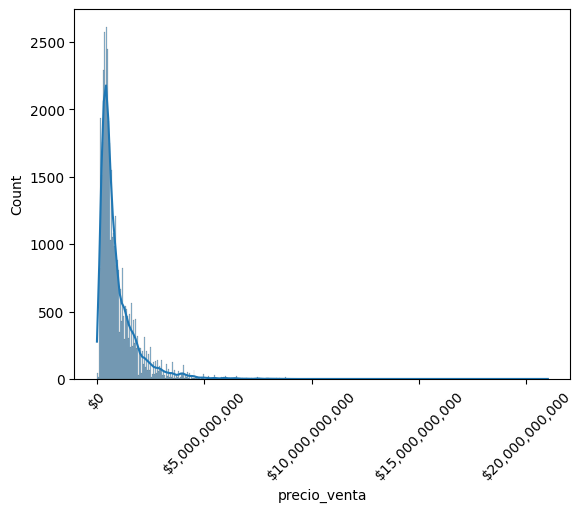

In [192]:
# Gets the histogram
precio = sns.histplot(df_ventas['precio_venta'], kde=True)
# Rotates the x labels
plt.xticks(rotation=45)
# Applies money format
ax = plt.gca()
ax.xaxis.set_major_formatter(lambda x, pos: "${:,.0f}".format(x))


Al examinar el histograma, se evidencia que los datos no se adhieren a una distribución normal. Dado que estamos tratando con activos como propiedades e inmuebles, la distribución de los datos muestra una clara tendencia hacia el principio de la ley del 80/20. Por consiguiente, resulta más apropiado emplear una distribución tipo Pareto o Exponencial para llevar a cabo el análisis correspondiente

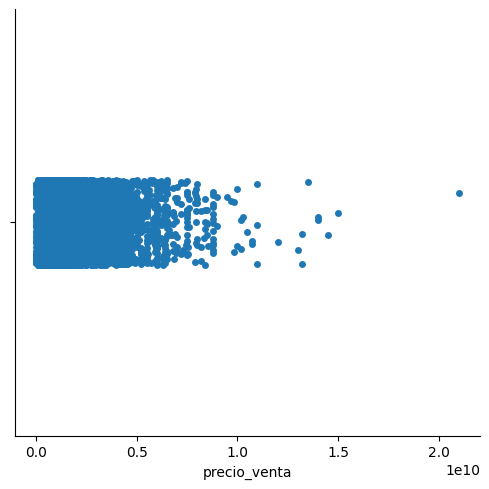

In [193]:
sns.catplot(
    x='precio_venta',
    data=df_ventas,
)

In [194]:
# Creamos la muestra de precios de venta
sample_ventas = df_ventas.precio_venta.values

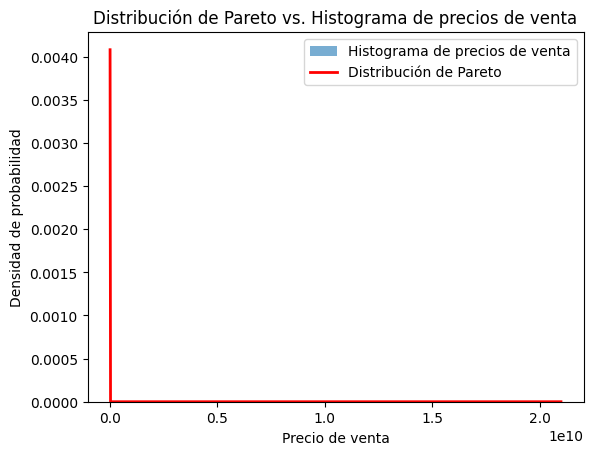

In [195]:
# Ajustamos la distribución de pareto a los datos
dis_ventas = stats.pareto(b = 1000, scale=np.min(sample_ventas))

# Generamos puntos en el rango de interés
x = np.linspace(np.min(sample_ventas), np.max(sample_ventas), 1000)

# Calculamos la función de densidad de probabilidad para cada punto
pdf_ventas = dis_ventas.pdf(x)

# Graficamos la PDF de la distribución de Pareto y el histograma de los datos
plt.hist(sample_ventas, bins=30, density=True, alpha=0.6, label='Histograma de precios de venta')
plt.plot(x, pdf_ventas, 'r-', lw=2, label='Distribución de Pareto')
plt.xlabel('Precio de venta')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de Pareto vs. Histograma de precios de venta')
plt.legend()
plt.show()

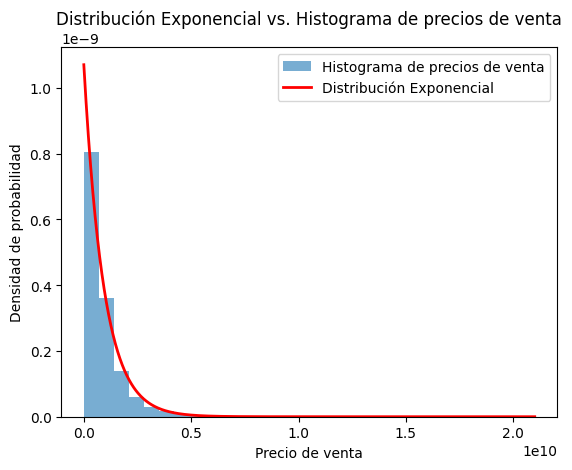

In [196]:
# Ajustamos la distribución exponencial a los datos
loc = np.min(sample_ventas)  # Localización, en este caso sería el valor mínimo
scale = np.mean(sample_ventas) - loc  # Escala basada en la media
dis_ventas = stats.expon(loc=loc, scale=scale)

# Generamos puntos en el rango de interés
x_ventas = np.linspace(np.min(sample_ventas), np.max(sample_ventas), 1000)

# Calculamos la función de densidad de probabilidad para cada punto
pdf_ventas = stats.expon.pdf(x_ventas, loc=loc, scale=scale)

# Graficamos la PDF de la distribución exponencial y el histograma de los datos
plt.hist(sample_ventas, bins=30, density=True, alpha=0.6, label='Histograma de precios de venta')
plt.plot(x_ventas, pdf_ventas, 'r-', lw=2, label='Distribución Exponencial')
plt.xlabel('Precio de venta')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Exponencial vs. Histograma de precios de venta')
plt.legend()
plt.show()

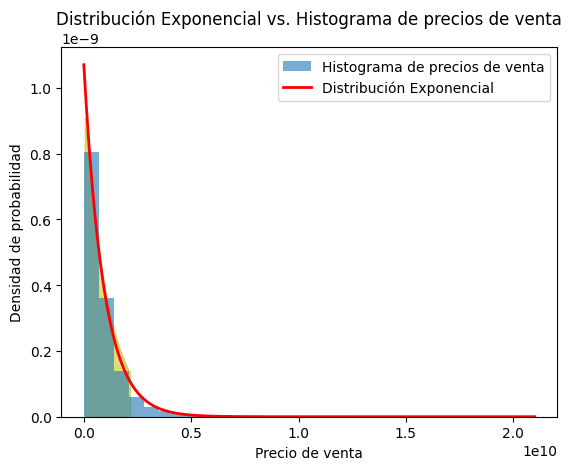

In [197]:
sample_ventas = df_ventas.precio_venta.values
# Ajustamos la distribución exponencial a los datos
loc = np.min(sample_ventas)  # Localización, en este caso sería el valor mínimo
scale = np.mean(sample_ventas) - loc  # Escala basada en la media
dis_ventas = stats.expon(loc=loc, scale=scale)

# Generamos puntos en el rango de interés
x_ventas = np.linspace(np.min(sample_ventas), np.max(sample_ventas), 1000)

# Calculamos la función de densidad de probabilidad para cada punto
pdf_ventas = dis_ventas.pdf(x_ventas)
# Calculamos el sombreado que indica el 90% de intervalo de confiaza
x_prueba = np.linspace(dis_ventas.ppf(0.05), dis_ventas.ppf(0.90), 1000)
dis_prueba = stats.expon(loc=np.min(x_prueba), scale= np.mean(x_prueba) - loc)
pdf_prueba = dis_prueba.pdf(x_prueba)
plt.fill_between(x_prueba, np.zeros_like(x_prueba), pdf_prueba, alpha=0.5, color = 'y')

# Graficamos la PDF de la distribución exponencial y el histograma de los datos
plt.hist(sample_ventas, bins=30, density=True, alpha=0.6, label='Histograma de precios de venta')
plt.plot(x_ventas, pdf_ventas, 'r-', lw=2, label='Distribución Exponencial')
plt.xlabel('Precio de venta')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Exponencial vs. Histograma de precios de venta')
plt.legend()
plt.show()

In [198]:
sample_arriendo = df_arriendo.precio_arriendo

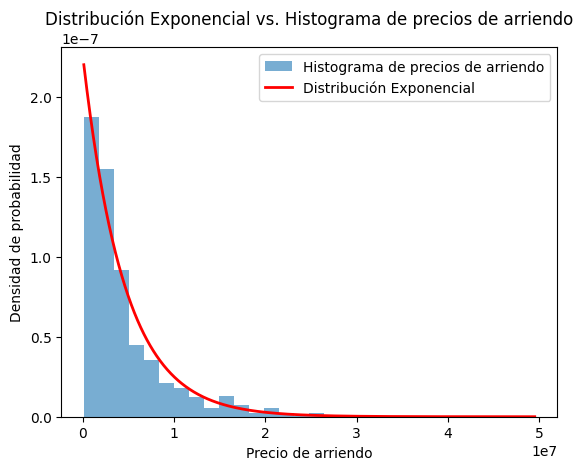

In [199]:
# Ajustamos la distribución exponencial a los datos
loc = np.min(sample_arriendo)  # Localización, en este caso sería el valor mínimo
scale = np.mean(sample_arriendo) - loc  # Escala basada en la media
dis_arriendo = stats.expon(loc=loc, scale=scale)

# Generamos puntos en el rango de interés
x_arriendo = np.linspace(np.min(sample_arriendo), np.max(sample_arriendo), 1000)

# Calculamos la función de densidad de probabilidad para cada punto
pdf_ventas = stats.expon.pdf(x_arriendo, loc=loc, scale=scale)

# Graficamos la PDF de la distribución exponencial y el histograma de los datos
plt.hist(sample_arriendo, bins=30, density=True, alpha=0.6, label='Histograma de precios de arriendo')
plt.plot(x_arriendo, pdf_ventas, 'r-', lw=2, label='Distribución Exponencial')
plt.xlabel('Precio de arriendo')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Exponencial vs. Histograma de precios de arriendo')
plt.legend()
plt.show()

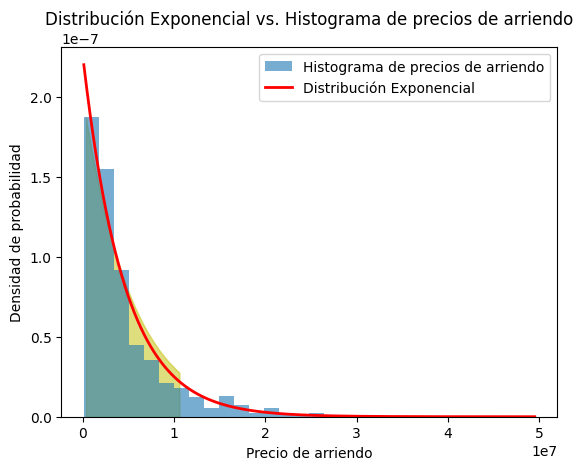

In [200]:
sample_arriendo = df_arriendo.precio_arriendo
def dis_arr_localidad(a):
  # Ajustamos la distribución exponencial a los datos
  loc = np.min(a)  # Localización, en este caso sería el valor mínimo
  scale = np.mean(a) - loc  # Escala basada en la media
  dis_arriendo = stats.expon(loc=loc, scale=scale)

  # Generamos puntos en el rango de interés
  x_arriendo = np.linspace(np.min(a), np.max(a), 1000)

  # Calculamos la función de densidad de probabilidad para cada punto
  pdf_arriendo = stats.expon.pdf(x_arriendo, loc=loc, scale=scale)

  # Calculamos el sombreado que indica el 90% de intervalo de confiaza
  x_prueba = np.linspace(dis_arriendo.ppf(0.05), dis_arriendo.ppf(0.90), 1000)
  dis_prueba = stats.expon(loc=np.min(x_prueba), scale= np.mean(x_prueba) - loc)
  pdf_prueba = dis_prueba.pdf(x_prueba)
  plt.fill_between(x_prueba, np.zeros_like(x_prueba), pdf_prueba, alpha=0.5, color = 'y')

  # Graficamos la PDF de la distribución exponencial y el histograma de los datos
  plt.hist(a, bins=30, density=True, alpha=0.6, label='Histograma de precios de arriendo')
  plt.plot(x_arriendo, pdf_arriendo, 'r-', lw=2, label='Distribución Exponencial')
  plt.xlabel('Precio de arriendo')
  plt.ylabel('Densidad de probabilidad')
  plt.title('Distribución Exponencial vs. Histograma de precios de arriendo')
  plt.legend()
  plt.show()
dis_arr_localidad(sample_arriendo)

Como se puede apreciar en las gráficas anteriores, la distribución que mejor se ajusta a nuestros datos es de naturaleza exponencial.

# 4. Análisis de datos

## 4.1 Intervalos de confianza

In [201]:
a = dis_ventas.ppf(0.05)
b = dis_ventas.ppf(0.95)

a, b

(48152138.48803794, 2798212309.6814957)

In [202]:
def dis_v_localidad(a):
  values = {}
  loc = np.min(a)  # Localización, en este caso sería el valor mínimo
  scale = np.mean(a) - loc  # Escala basada en la media
  dis_ventas = stats.expon(loc=loc, scale=scale)
  x_ventas = np.linspace(np.min(a), np.max(a), 1000)
  pdf_ventas = dis_ventas.pdf(x_ventas)
# return values

  # Calculamos el sombreado para un intervalo con el 90% de confianza
  x_prueba = np.linspace(dis_ventas.ppf(0.05), dis_ventas.ppf(0.90), 1000)
  dis_prueba = stats.expon(loc=np.min(x_prueba), scale= np.mean(x_prueba) - loc)
  pdf_prueba = dis_prueba.pdf(x_prueba)
  plt.fill_between(x_prueba, np.zeros_like(x_prueba), pdf_prueba, alpha=0.9, color = 'y')

#def grafica_hist_dis(a,b,c):
  plt.hist(a, bins=30, density=True, alpha=0.6, label='Histograma de precios de venta')
  plt.plot(x_ventas, pdf_ventas, 'r-', lw=2, label='Distribución Exponencial')
  plt.xlabel('Precio de venta')
  plt.ylabel('Densidad de probabilidad')
  plt.title('Distribución Exponencial vs. Histograma de precios de venta')
  plt.legend()
  plt.show()



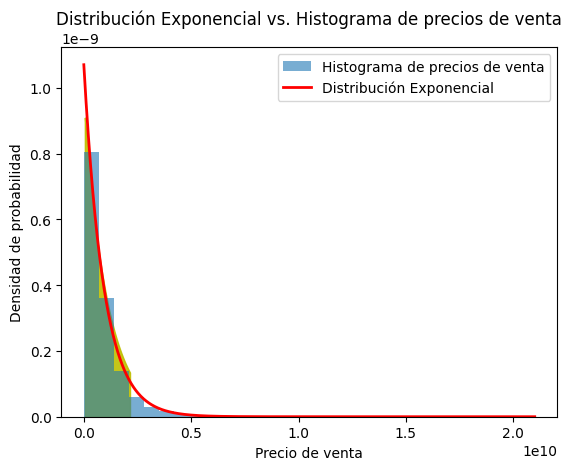

In [203]:
sample_ventas = df_ventas.precio_venta.values
dis_v_localidad(sample_ventas)

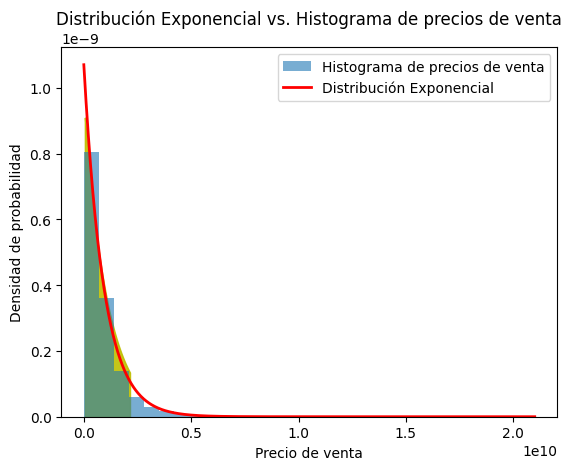

In [204]:
sample_ventas = df_ventas.precio_venta.values
# Ajustamos la distribución exponencial a los datos
loc = np.min(sample_ventas)  # Localización, en este caso sería el valor mínimo
scale = np.mean(sample_ventas) - loc  # Escala basada en la media
dis_ventas = stats.expon(loc=loc, scale=scale)

# Generamos puntos en el rango de interés
x_ventas = np.linspace(np.min(sample_ventas), np.max(sample_ventas), 1000)

# Calculamos la función de densidad de probabilidad para cada punto
pdf_ventas = dis_ventas.pdf(x_ventas)

# Calculamos el sombreado para un intervalo con el 90% de confianza
x_prueba = np.linspace(dis_ventas.ppf(0.05), dis_ventas.ppf(0.90), 1000)
dis_prueba = stats.expon(loc=np.min(x_prueba), scale= np.mean(x_prueba) - loc)
pdf_prueba = dis_prueba.pdf(x_prueba)
plt.fill_between(x_prueba, np.zeros_like(x_prueba), pdf_prueba, alpha=0.9, color = 'y')

# Graficamos la PDF de la distribución exponencial y el histograma de los datos
plt.hist(sample_ventas, bins=30, density=True, alpha=0.6, label='Histograma de precios de venta')
plt.plot(x_ventas, pdf_ventas, 'r-', lw=2, label='Distribución Exponencial')
plt.xlabel('Precio de venta')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Exponencial vs. Histograma de precios de venta')
plt.legend()
plt.show()

In [205]:
a = dis_arriendo.ppf(0.05)
b = dis_arriendo.ppf(0.95)

a, b

(333094.1230840985, 13713623.293969637)

## 4.2 Intervalos de confianza por localidad

In [206]:
variables = {}
for i in df_ventas['localidad'].unique():
    # Crear una variable con un nombre dinámico, por ejemplo, var0, var1, var2, ...
    nombre_variable = 'sample_v_'+i.replace(" ","_")
    # Asignar un valor a la variable
    valor_variable = df_ventas.loc[df_ventas['localidad']==i,'precio_venta'].values
    # Almacenar la variable en el diccionario
    variables[nombre_variable] = valor_variable
for nombre_variable, valor_variable in variables.items():
    globals()[nombre_variable] = valor_variable

### 4.2.1 Intevalo de confianza de venta localidad

Acontinuacion se observa la distribucion exponencial aplicada a los valores de venta de las 7 localidades con muestras mas grandes. Se observa que la esta distribucion es adecuado para algunas de estas, presentandose casos en los que se debe reevaluar el tipo de distribucion a usar por la elevada discrepancia y pobre ajuste.
Las localidades a las que mejor se ajusta la distribucion exponencial son USAQUEN, CHAPINERO y KENNEDY.

Adicionalmente, se determinan intervalos para establecer un rango de precio de venta de inmuebles con un 90% de confianza.

In [207]:
df_ventas['localidad'].value_counts()

USAQUEN               16470
CHAPINERO             11098
SUBA                   7725
KENNEDY                1680
FONTIBON               1517
ENGATIVA               1291
TEUSAQUILLO            1192
SANTA FE                630
BOSA                    563
BARRIOS UNIDOS          471
CIUDAD BOLIVAR          263
PUENTE ARANDA           252
LOS MARTIRES            186
USME                    133
RAFAEL URIBE URIBE      117
CANDELARIA               89
ANTONIO NARINO           72
SAN CRISTOBAL            69
TUNJUELITO               40
Name: localidad, dtype: int64

DISTRIBUCION EXPONENCIAL DE PRECIO DE VENTA PARA USAQUEN

In [208]:
# Ajustamos la distribución exponencial para USAQUEN
loc = np.min(variables['sample_v_USAQUEN'])  # Localización, en este caso sería el valor mínimo
scale = np.mean(variables['sample_v_USAQUEN']) - loc  # Escala basada en la media
dis_ventas_USAQUEN = stats.expon(loc=loc, scale=scale)

In [209]:
a = dis_ventas_USAQUEN.ppf(0.05)
b = dis_ventas_USAQUEN.ppf(0.95)

a, b

(47803053.39824623, 2728743954.4230027)

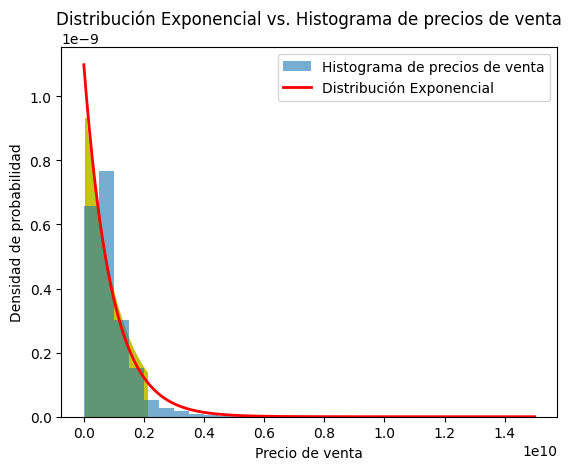

In [210]:
dis_v_localidad(variables['sample_v_USAQUEN'])

DISTRIBUCION EXPONENCIAL DE PRECIO DE VENTA PARA CHAPINERO

In [211]:
# Ajustamos la distribución exponencial para CHAPINERO
loc = np.min(variables['sample_v_CHAPINERO'])  # Localización, en este caso sería el valor mínimo
scale = np.mean(variables['sample_v_CHAPINERO']) - loc  # Escala basada en la media
dis_ventas_CHAPINERO = stats.expon(loc=loc, scale=scale)

In [212]:
a = dis_ventas_CHAPINERO.ppf(0.05)
b = dis_ventas_CHAPINERO.ppf(0.95)

a, b

(84959145.84204717, 4898807441.70929)

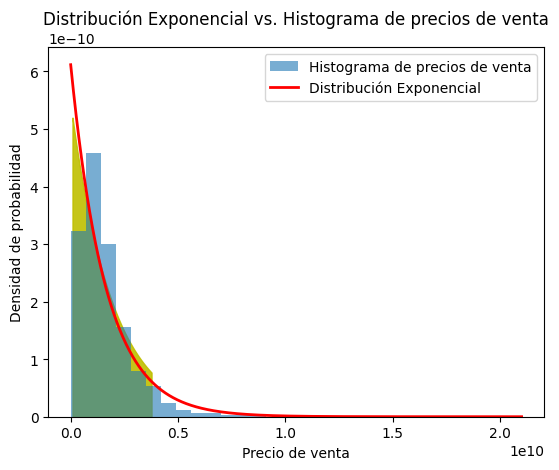

In [213]:
dis_v_localidad(variables['sample_v_CHAPINERO'])

DISTRIBUCION EXPONENCIAL DE PRECIO DE VENTA PARA SUBA

In [214]:
# Ajustamos la distribución exponencial para SUBA
loc = np.min(variables['sample_v_SUBA'])  # Localización, en este caso sería el valor mínimo
scale = np.mean(variables['sample_v_SUBA']) - loc  # Escala basada en la media
dis_ventas_SUBA = stats.expon(loc=loc, scale=scale)

In [215]:
a = dis_ventas_SUBA.ppf(0.05)
b = dis_ventas_SUBA.ppf(0.95)

a, b

(31655476.626862507, 1785661287.3548136)

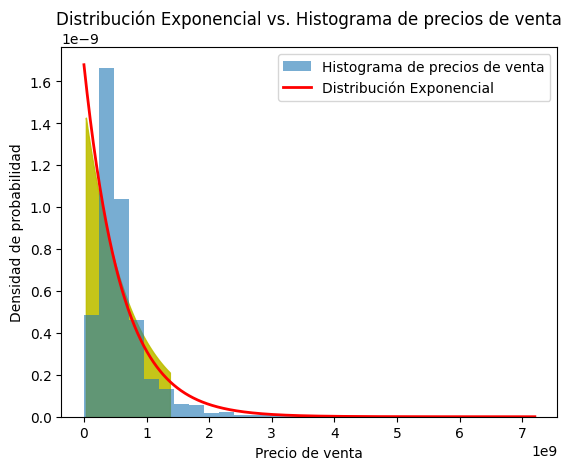

In [216]:
dis_v_localidad(variables['sample_v_SUBA'])

DISTRIBUCION EXPONENCIAL DE PRECIO DE VENTA PARA KENNEDY

In [217]:
# Ajustamos la distribución exponencial para KENNEDY
loc = np.min(variables['sample_v_KENNEDY'])  # Localización, en este caso sería el valor mínimo
scale = np.mean(variables['sample_v_KENNEDY']) - loc  # Escala basada en la media
dis_ventas_KENNEDY = stats.expon(loc=loc, scale=scale)

In [218]:
a = dis_ventas_KENNEDY.ppf(0.05)
b = dis_ventas_KENNEDY.ppf(0.95)

a, b

(102303015.75985101, 521525148.5069188)

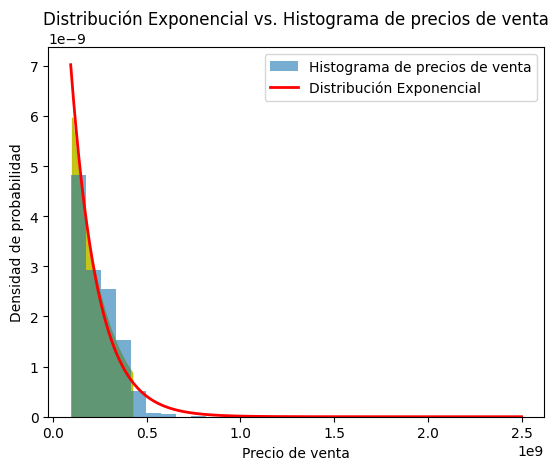

In [219]:
dis_v_localidad(variables['sample_v_KENNEDY'])

DISTRIBUCION EXPONENCIAL DE PRECIO DE VENTA PARA FONTIBON

In [220]:
# Ajustamos la distribución exponencial para FONTIBON
loc = np.min(variables['sample_v_FONTIBON'])  # Localización, en este caso sería el valor mínimo
scale = np.mean(variables['sample_v_FONTIBON']) - loc  # Escala basada en la media
dis_ventas_FONTIBON = stats.expon(loc=loc, scale=scale)

In [221]:
a = dis_ventas_FONTIBON.ppf(0.05)
b = dis_ventas_FONTIBON.ppf(0.95)

a, b

(27260552.46386777, 1440004086.266228)

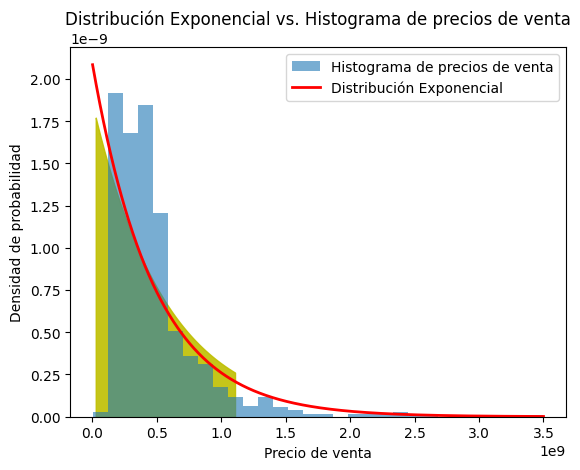

In [222]:
dis_v_localidad(variables['sample_v_FONTIBON'])

DISTRIBUCION EXPONENCIAL DE PRECIO DE VENTA PARA ENGATIVA

In [223]:
# Ajustamos la distribución exponencial para ENGATIVA
loc = np.min(variables['sample_v_ENGATIVA'])  # Localización, en este caso sería el valor mínimo
scale = np.mean(variables['sample_v_ENGATIVA']) - loc  # Escala basada en la media
dis_ventas_ENGATIVA = stats.expon(loc=loc, scale=scale)

In [224]:
a = dis_ventas_ENGATIVA.ppf(0.05)
b = dis_ventas_ENGATIVA.ppf(0.95)

a, b

(16191091.654786887, 931560135.3930076)

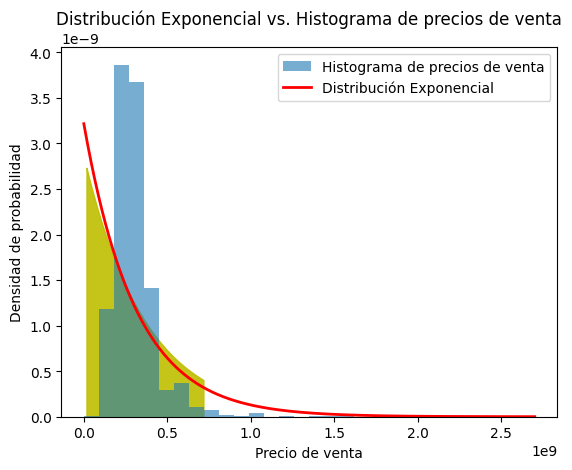

In [225]:
dis_v_localidad(variables['sample_v_ENGATIVA'])

DISTRIBUCION EXPONENCIAL DE PRECIO DE VENTA PARA TEUSAQUILLO

In [226]:
# Ajustamos la distribución exponencial para TEUSAQUILLO
loc = np.min(variables['sample_v_TEUSAQUILLO'])  # Localización, en este caso sería el valor mínimo
scale = np.mean(variables['sample_v_TEUSAQUILLO']) - loc  # Escala basada en la media
dis_ventas_TEUSAQUILLO = stats.expon(loc=loc, scale=scale)

In [227]:
a = dis_ventas_TEUSAQUILLO.ppf(0.05)
b = dis_ventas_TEUSAQUILLO.ppf(0.95)

a, b

(29495975.418995634, 1691110019.3469393)

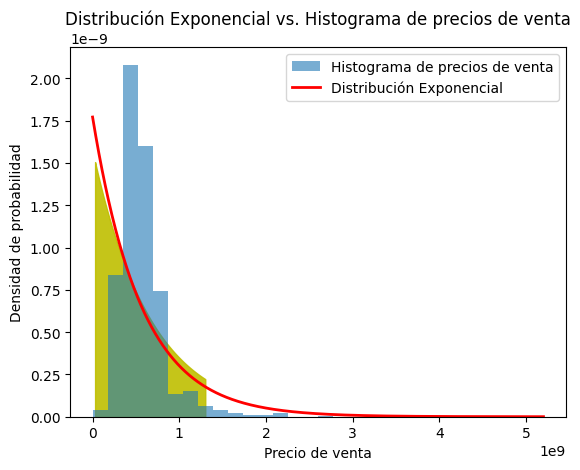

In [228]:
dis_v_localidad(variables['sample_v_TEUSAQUILLO'])

## 4.2.1 Intevalo de confianza de renta por localidad

Acontinuacion se observa la distribucion exponencial aplicada a los valores de venta de las 7 localidades con muestras mas grandes. Se observa que la esta distribucion es adecuado para algunas de estas, presentandose casos en los que se debe reevaluar el tipo de distribucion a usar por la elevada discrepancia y pobre ajuste.
Las localidades a las que mejor se ajusta la distribucion exponencial son CHAPINERO, SUBA y TEUSAQUILLO

Adicionalmente, se determinan intervalos para establecer un rango de precio de arriendo con un 90% de confianza.

In [229]:
# LOCALIDADES CON MAYOR NUMERO DE MUESTRAS PARA ARRIENDO
df_arriendo['localidad'].value_counts()

CHAPINERO             6340
USAQUEN               5944
SUBA                  2214
ENGATIVA               708
KENNEDY                661
FONTIBON               638
TEUSAQUILLO            617
SANTA FE               539
PUENTE ARANDA          410
BARRIOS UNIDOS         348
BOSA                   161
LOS MARTIRES           155
CIUDAD BOLIVAR         153
RAFAEL URIBE URIBE     126
CANDELARIA              86
SAN CRISTOBAL           86
ANTONIO NARINO          81
TUNJUELITO              42
USME                    18
Name: localidad, dtype: int64

In [293]:
# Codigo para hallar los valorres de precio de arriendo en cada localidad
variables_r = {}
for i in df_arriendo['localidad'].unique():
    # Crear una variable con un nombre dinámico, por ejemplo, var0, var1, var2, ...
    nombre_variable = 'sample_r_'+i.replace(" ","_")
    # Asignar un valor a la variable
    valor_variable = df_arriendo.loc[df_arriendo['localidad']==i,'precio_arriendo'].values
    # Almacenar la variable en el diccionario
    variables_r[nombre_variable] = valor_variable
for nombre_variable, valor_variable in variables_r.items():
    globals()[nombre_variable] = valor_variable

DISTRIBUCION EXPONENCIAL DE PRECIO DE ARRIENDO PARA CHAPINERO

In [231]:
# Ajustamos la distribución exponencial para CHAPINERO
loc = np.min(variables_r['sample_r_CHAPINERO'])  # Localización, en este caso sería el valor mínimo
scale = np.mean(variables_r['sample_r_CHAPINERO']) - loc  # Escala basada en la media
dis_rentas_CHAPINERO = stats.expon(loc=loc, scale=scale)

In [232]:
a = dis_rentas_CHAPINERO.ppf(0.05)
b = dis_rentas_CHAPINERO.ppf(0.95)

a, b

(1153244.646825724, 21430891.456502862)

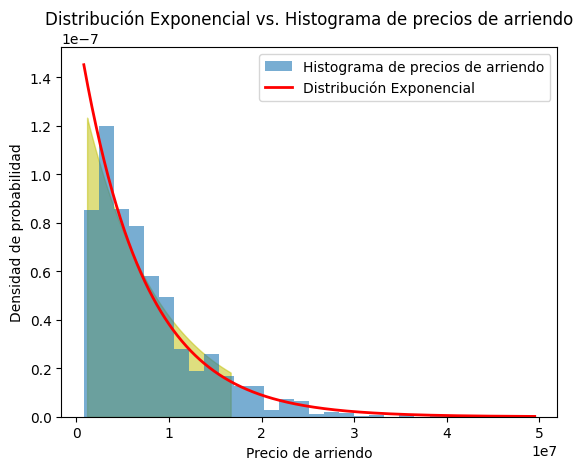

In [233]:
dis_arr_localidad(variables_r['sample_r_CHAPINERO'])

DISTRIBUCION EXPONENCIAL DE PRECIO DE ARRIENDO PARA USAQUEN

In [234]:
# Ajustamos la distribución exponencial para USAQUEN
loc = np.min(variables_r['sample_r_USAQUEN'])  # Localización, en este caso sería el valor mínimo
scale = np.mean(variables_r['sample_r_USAQUEN']) - loc  # Escala basada en la media
dis_rentas_USAQUEN = stats.expon(loc=loc, scale=scale)

In [235]:
a = dis_rentas_USAQUEN.ppf(0.05)
b = dis_rentas_USAQUEN.ppf(0.95)

a, b

(334239.3615862605, 13780509.774606295)

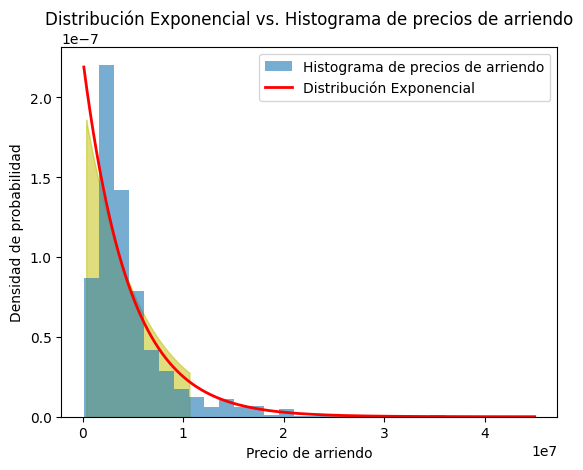

In [236]:
dis_arr_localidad(variables_r['sample_r_USAQUEN'])

DISTRIBUCION EXPONENCIAL DE PRECIO DE ARRIENDO PARA SUBA

In [237]:
# Ajustamos la distribución exponencial para SUBA
loc = np.min(variables_r['sample_r_SUBA'])  # Localización, en este caso sería el valor mínimo
scale = np.mean(variables_r['sample_r_SUBA']) - loc  # Escala basada en la media
dis_rentas_SUBA = stats.expon(loc=loc, scale=scale)

In [238]:
a = dis_rentas_SUBA.ppf(0.05)
b = dis_rentas_SUBA.ppf(0.95)

a, b

(596730.6935045156, 6723496.735352605)

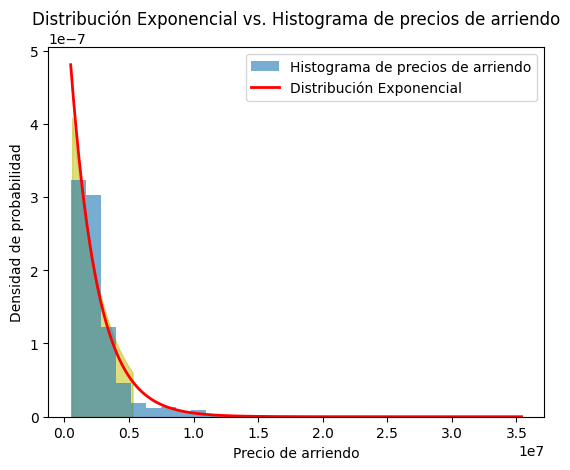

In [239]:
dis_arr_localidad(variables_r['sample_r_SUBA'])

DISTRIBUCION EXPONENCIAL DE PRECIO DE ARRIENDO PARA ENGATIVA

In [240]:
# Ajustamos la distribución exponencial para ENGATIVA
loc = np.min(variables_r['sample_r_ENGATIVA'])  # Localización, en este caso sería el valor mínimo
scale = np.mean(variables_r['sample_r_ENGATIVA']) - loc  # Escala basada en la media
dis_rentas_ENGATIVA = stats.expon(loc=loc, scale=scale)

In [241]:
a = dis_rentas_ENGATIVA.ppf(0.05)
b = dis_rentas_ENGATIVA.ppf(0.95)

a, b

(542435.2232558728, 2978385.7102760356)

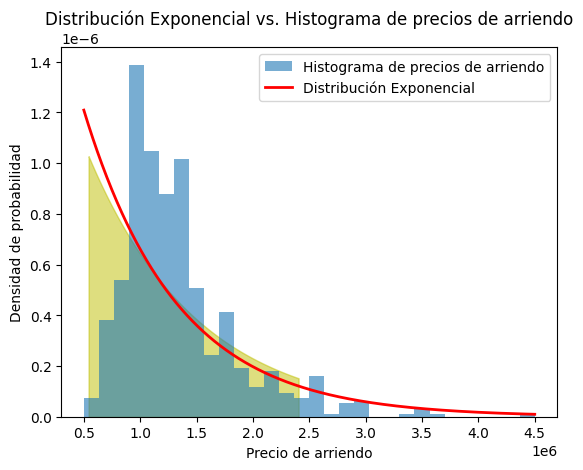

In [242]:
dis_arr_localidad(variables_r['sample_r_ENGATIVA'])

DISTRIBUCION EXPONENCIAL DE PRECIO DE ARRIENDO PARA KENNEDY

In [243]:
# Ajustamos la distribución exponencial para KENNEDY
loc = np.min(variables_r['sample_r_KENNEDY'])  # Localización, en este caso sería el valor mínimo
scale = np.mean(variables_r['sample_r_KENNEDY']) - loc  # Escala basada en la media
dis_rentas_KENNEDY = stats.expon(loc=loc, scale=scale)

In [244]:
a = dis_rentas_KENNEDY.ppf(0.05)
b = dis_rentas_KENNEDY.ppf(0.95)

a, b

(485910.0344439131, 2547288.7472436544)

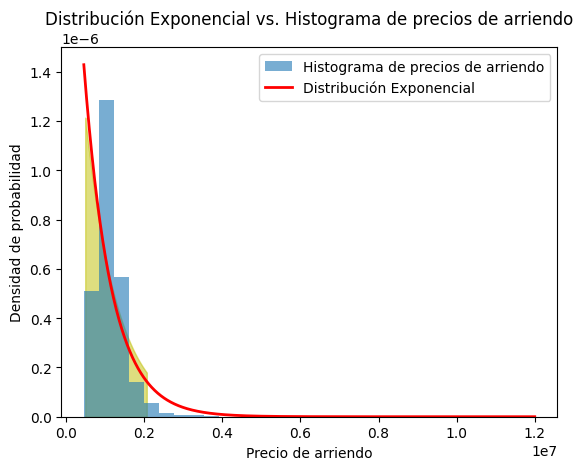

In [245]:
dis_arr_localidad(variables_r['sample_r_KENNEDY'])

DISTRIBUCION EXPONENCIAL DE PRECIO DE ARRIENDO PARA FONTIBON

In [246]:
# Ajustamos la distribución exponencial para FONTIBON
loc = np.min(variables_r['sample_r_FONTIBON'])  # Localización, en este caso sería el valor mínimo
scale = np.mean(variables_r['sample_r_FONTIBON']) - loc  # Escala basada en la media
dis_rentas_FONTIBON = stats.expon(loc=loc, scale=scale)

In [247]:
a = dis_rentas_FONTIBON.ppf(0.05)
b = dis_rentas_FONTIBON.ppf(0.95)

a, b

(684142.3463149973, 4366167.978712478)

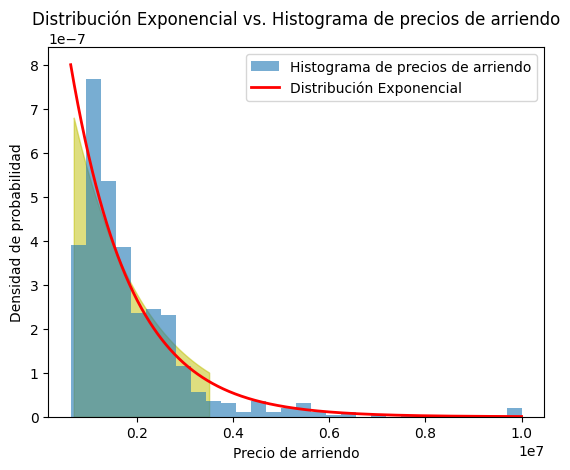

In [248]:
dis_arr_localidad(variables_r['sample_r_FONTIBON'])

DISTRIBUCION EXPONENCIAL DE PRECIO DE ARRIENDO PARA TEUSAQUILLO

In [249]:
# Ajustamos la distribución exponencial para TEUSAQUILLO
loc = np.min(variables_r['sample_r_TEUSAQUILLO'])  # Localización, en este caso sería el valor mínimo
scale = np.mean(variables_r['sample_r_TEUSAQUILLO']) - loc  # Escala basada en la media
dis_rentas_TEUSAQUILLO = stats.expon(loc=loc, scale=scale)

In [250]:
a = dis_rentas_TEUSAQUILLO.ppf(0.05)
b = dis_rentas_TEUSAQUILLO.ppf(0.95)

a, b

(564563.6881179605, 5418855.511047356)

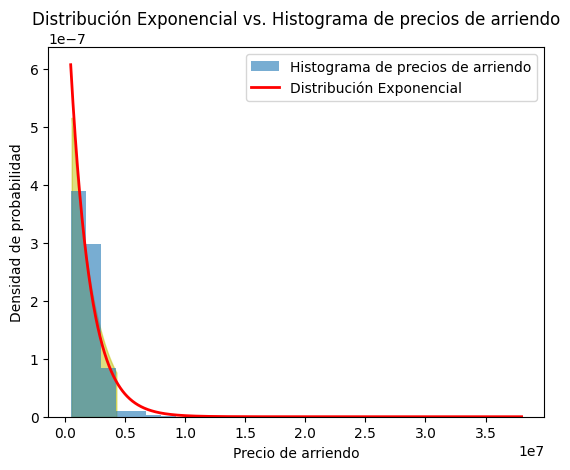

In [251]:
dis_arr_localidad(variables_r['sample_r_TEUSAQUILLO'])

## 4.2 Correlaciones

## 4.2.1 Correlaciones de precio del inmueble en la muestra total

In [252]:
(
    df_ventas.corr()
)

<ipython-input-252-f4b2dcacf6ad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ventas.corr()


,precio_venta,area,habitaciones,parqueaderos,estrato,longitud,latitud,jacuzzi,chimenea,gimnasio,ascensor,conjunto_cerrado,coords_modified,distancia_estacion_tm_m,is_cerca_estacion_tm
precio_venta,1.000000,0.494062,0.360803,0.690195,0.516019,0.309373,-0.086788,0.191764,0.324604,0.182152,0.134176,-0.012883,0.041771,0.057294,-0.104509
area,0.494062,1.000000,0.308763,0.425022,0.317423,0.200384,-0.001817,0.122200,0.220988,0.057783,0.066990,-0.006479,0.025938,0.032727,-0.065067
habitaciones,0.360803,0.308763,1.000000,0.365395,0.116410,-0.001329,0.113316,0.113170,0.206753,0.000693,-0.023051,0.068656,0.007491,0.107530,-0.118264
parqueaderos,0.690195,0.425022,0.365395,1.000000,0.669588,0.477875,0.098471,0.174469,0.409090,0.197480,0.227251,0.001082,0.040971,-0.031963,-0.070917
estrato,0.516019,0.317423,0.116410,0.669588,1.000000,0.641354,0.108326,0.088003,0.403247,0.107622,0.245703,-0.094003,0.051065,-0.112095,-0.050338
longitud,0.309373,0.200384,-0.001329,0.477875,0.641354,1.000000,0.430774,0.058207,0.273308,0.100417,0.203327,-0.043794,0.040298,-0.090756,-0.045038
latitud,-0.086788,-0.001817,0.113316,0.098471,0.108326,0.430774,1.000000,0.042679,0.063880,0.086920,0.042197,0.115388,-0.018379,0.035636,-0.119729
jacuzzi,0.191764,0.122200,0.113170,0.174469,0.088003,0.058207,0.042679,1.000000,0.178806,0.173796,0.098324,0.103409,0.013410,0.030146,-0.021409
chimenea,0.324604,0.220988,0.206753,0.409090,0.403247,0.273308,0.063880,0.178806,1.000000,0.150858,0.250992,0.042726,0.017764,-0.000238,-0.059058
gimnasio,0.182152,0.057783,0.000693,0.197480,0.107622,0.100417,0.086920,0.173796,0.150858,1.000000,0.310678,0.256295,-0.008215,0.026836,-0.018031


In [279]:
(
    df_ventas
    .groupby('localidad')
    .corr()
).head(30)


<ipython-input-279-7385f93adc7d>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .corr()


precio_venta      area  habitaciones  \
localidad                                                                      
ANTONIO NARINO precio_venta                 1.000000  0.864911      0.189610   
               area                         0.864911  1.000000      0.493228   
               habitaciones                 0.189610  0.493228      1.000000   
               parqueaderos                 0.572914  0.467571      0.173724   
               estrato                      0.913961  0.705768      0.036308   
               longitud                     0.314725  0.502495      0.483321   
               latitud                     -0.184431 -0.447784     -0.488431   
               jacuzzi                      0.034105  0.083989      0.040710   
               chimenea                     0.484763  0.355698     -0.081778   
               gimnasio                     0.350631  0.227217     -0.029356   
               ascensor                     0.151513 -0.056029     -0.357587   
               conjunto_cerrado            -0.149341 -0.217646     -0.071361   
               coords_modified                   NaN       NaN           NaN   
               distancia_estacion_tm_m     -0.313789 -0.487747     -0.350407   
               is_cerca_estacion_tm         0.262423  0.491794      0.492420   
BARRIOS UNIDOS precio_venta                 1.000000  0.810363      0.435087   
               area                         0.810363  1.000000      0.597947   
               habitaciones                 0.435087  0.597947      1.000000   
               parqueaderos                 0.637351  0.480658      0.220049   
               estrato                      0.333541  0.297111      0.027936   
               longitud                     0.234294  0.192516     -0.046971   
               latitud                      0.176257  0.218767      0.048791   
               jacuzzi                      0.256968  0.202444      0.019921   
               chimenea                     0.208928  0.292817      0.231415   
               gimnasio                     0.084830 -0.148012     -0.063629   
               ascensor                     0.153874 -0.103898     -0.043226   
               conjunto_cerrado            -0.003250 -0.014581      0.153006   
               coords_modified                   NaN       NaN           NaN   
               distancia_estacion_tm_m     -0.160200 -0.100814     -0.018760   
               is_cerca_estacion_tm         0.135325  0.065835     -0.033691   

                                        parqueaderos   estrato  longitud  \
localidad                                                                  
ANTONIO NARINO precio_venta                 0.572914  0.913961  0.314725   
               area                         0.467571  0.705768  0.502495   
               habitaciones                 0.173724  0.036308  0.483321   
               parqueaderos                 1.000000  0.522669  0.106769   
               estrato                      0.522669  1.000000  0.283322   
               longitud                     0.106769  0.283322  1.000000   
               latitud                      0.016828 -0.056007 -0.613333   
               jacuzzi                      0.161256 -0.025482 -0.061069   
               chimenea                     0.332962  0.621582 -0.013255   
               gimnasio                     0.391611  0.459390 -0.115642   
               ascensor                     0.092076  0.271163 -0.330584   
               conjunto_cerrado             0.092809 -0.042951 -0.118518   
               coords_modified                   NaN       NaN       NaN   
               distancia_estacion_tm_m     -0.095024 -0.270221 -0.486968   
               is_cerca_estacion_tm         0.119265  0.183573  0.510877   
BARRIOS UNIDOS precio_venta                 0.637351  0.333541  0.234294   
               area                         0.480658  0.297111  0.192516   
               habitaciones        

In [258]:
df_ventas.corr().sort_values(by='precio_venta', ascending = False)

<ipython-input-258-c380c43042a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ventas.corr().sort_values(by='precio_venta', ascending = False)


,precio_venta,area,habitaciones,parqueaderos,estrato,longitud,latitud,jacuzzi,chimenea,gimnasio,ascensor,conjunto_cerrado,coords_modified,distancia_estacion_tm_m,is_cerca_estacion_tm
precio_venta,1.000000,0.494062,0.360803,0.690195,0.516019,0.309373,-0.086788,0.191764,0.324604,0.182152,0.134176,-0.012883,0.041771,0.057294,-0.104509
parqueaderos,0.690195,0.425022,0.365395,1.000000,0.669588,0.477875,0.098471,0.174469,0.409090,0.197480,0.227251,0.001082,0.040971,-0.031963,-0.070917
estrato,0.516019,0.317423,0.116410,0.669588,1.000000,0.641354,0.108326,0.088003,0.403247,0.107622,0.245703,-0.094003,0.051065,-0.112095,-0.050338
area,0.494062,1.000000,0.308763,0.425022,0.317423,0.200384,-0.001817,0.122200,0.220988,0.057783,0.066990,-0.006479,0.025938,0.032727,-0.065067
habitaciones,0.360803,0.308763,1.000000,0.365395,0.116410,-0.001329,0.113316,0.113170,0.206753,0.000693,-0.023051,0.068656,0.007491,0.107530,-0.118264
chimenea,0.324604,0.220988,0.206753,0.409090,0.403247,0.273308,0.063880,0.178806,1.000000,0.150858,0.250992,0.042726,0.017764,-0.000238,-0.059058
longitud,0.309373,0.200384,-0.001329,0.477875,0.641354,1.000000,0.430774,0.058207,0.273308,0.100417,0.203327,-0.043794,0.040298,-0.090756,-0.045038
jacuzzi,0.191764,0.122200,0.113170,0.174469,0.088003,0.058207,0.042679,1.000000,0.178806,0.173796,0.098324,0.103409,0.013410,0.030146,-0.021409
gimnasio,0.182152,0.057783,0.000693,0.197480,0.107622,0.100417,0.086920,0.173796,0.150858,1.000000,0.310678,0.256295,-0.008215,0.026836,-0.018031
ascensor,0.134176,0.066990,-0.023051,0.227251,0.245703,0.203327,0.042197,0.098324,0.250992,0.310678,1.000000,0.149185,0.023977,-0.061921,0.012341


Coeficientes de correlacion mas altos de la totalidad de la muestra

In [259]:
def correlacion_pearson_con_significancia(x, y, alfa=0.05):
  coef, p = stats.pearsonr(x, y)
  print(f'Coeficiente de correlación de Pearson: {coef:.2f}')
  if p > alfa:
    print(f'Las muestras no están correlacionadas (no rechazar H0) (p = {p:.2f})')
  else:
    print(f'Las muestras están correlacionadas (rechazar H0) (p = {p:.2f})')
correlacion_pearson_con_significancia(df_ventas['precio_venta'], df_ventas['area'])

Coeficiente de correlación de Pearson: 0.49
Las muestras están correlacionadas (rechazar H0) (p = 0.00)


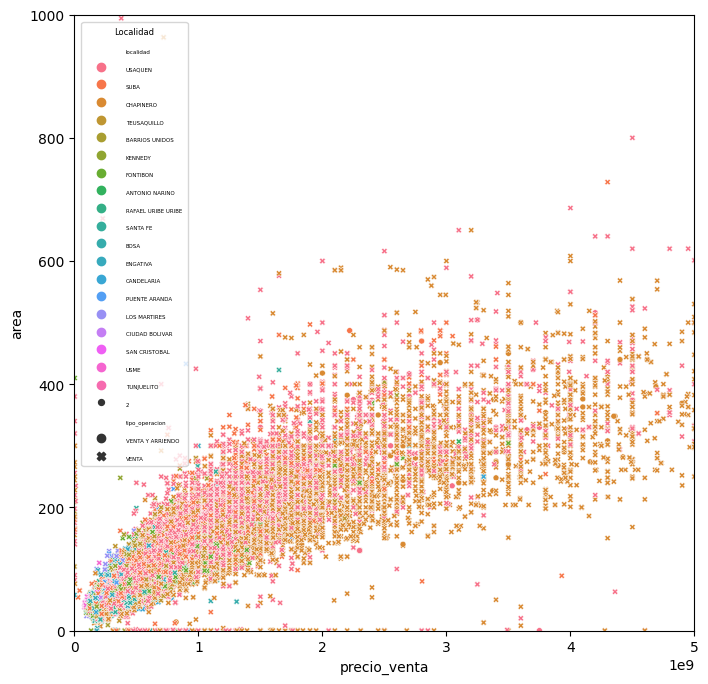

In [297]:
plt.figure(figsize=(8, 8))
fig = sns.scatterplot(data=df_ventas,
                x='precio_venta',
                y='area',
                size=2,
                style='tipo_operacion',
                hue='localidad',)

fig.set_xlim([0, 5000000000])
fig.set_ylim([0, 1000])

legend = plt.legend(title='Localidad')
legend.get_title().set_fontsize(6)
for item in legend.texts:
    item.set_fontsize(4)

In [294]:
correlacion_pearson_con_significancia(df_ventas['precio_venta'], df_ventas['parqueaderos'])

Coeficiente de correlación de Pearson: 0.69
Las muestras están correlacionadas (rechazar H0) (p = 0.00)


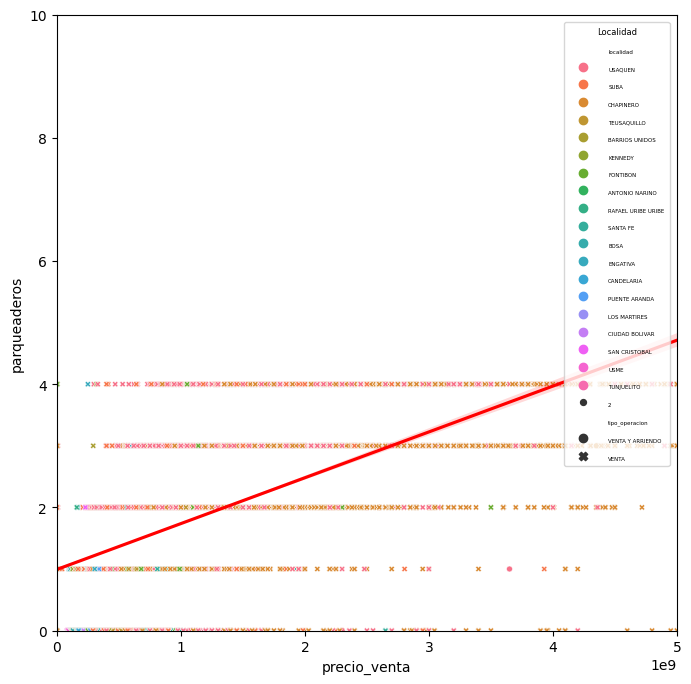

In [326]:
plt.figure(figsize=(8, 8))
fig = sns.scatterplot(data=df_ventas,
                x='precio_venta',
                y='parqueaderos',
                size=2,
                style='tipo_operacion',
                hue='localidad',)

fig.set_xlim([0, 5000000000])
fig.set_ylim([0, 10])

legend = plt.legend(title='Localidad')
legend.get_title().set_fontsize(6)
sns.regplot( x='precio_venta',
                y='parqueaderos', data=df_ventas, scatter_kws={'alpha': 0}, color='red')
for item in legend.texts:
    item.set_fontsize(4)

In [295]:
correlacion_pearson_con_significancia(df_ventas['precio_venta'], df_ventas['estrato'])

Coeficiente de correlación de Pearson: 0.52
Las muestras están correlacionadas (rechazar H0) (p = 0.00)


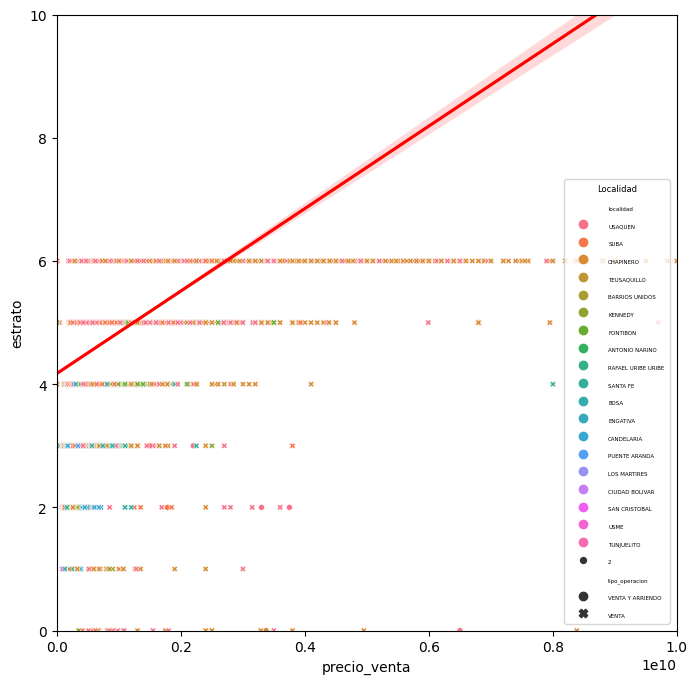

In [324]:
plt.figure(figsize=(8, 8))
fig = sns.scatterplot(data=df_ventas,
                x='precio_venta',
                y='estrato',
                size=2,
                style='tipo_operacion',
                hue='localidad',)

fig.set_xlim([0, 10000000000])
fig.set_ylim([0, 10])

legend = plt.legend(title='Localidad')
legend.get_title().set_fontsize(6)
sns.regplot( x='precio_venta',
                y='estrato', data=df_ventas, scatter_kws={'alpha': 0}, color='red')
for item in legend.texts:
    item.set_fontsize(4)

In [296]:
correlacion_pearson_con_significancia(df_ventas['precio_venta'], df_ventas['area'])

Coeficiente de correlación de Pearson: 0.49
Las muestras están correlacionadas (rechazar H0) (p = 0.00)


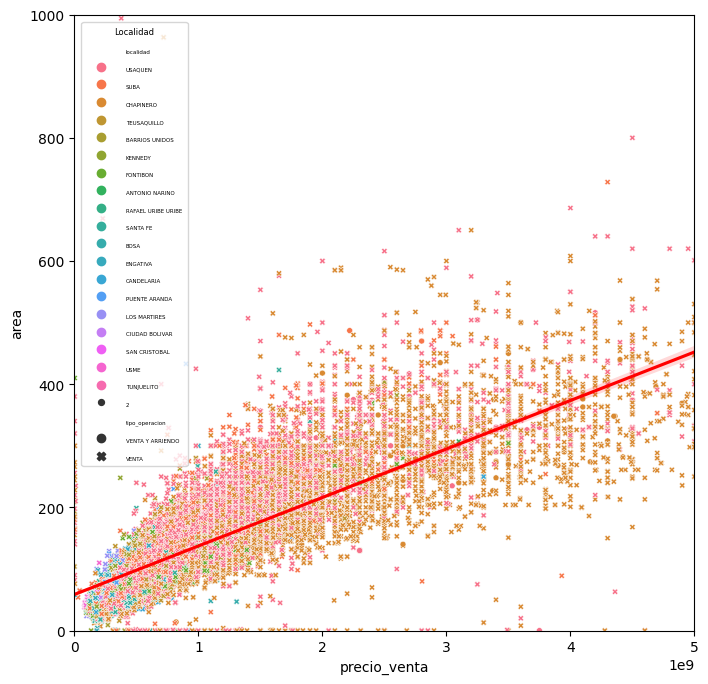

In [323]:
plt.figure(figsize=(8, 8))
fig = sns.scatterplot(data=df_ventas,
                x='precio_venta',
                y='area',
                size=2,
                style='tipo_operacion',
                hue='localidad',)

fig.set_xlim([0, 5000000000])
fig.set_ylim([0, 1000])

legend = plt.legend(title='Localidad')
legend.get_title().set_fontsize(6)
sns.regplot(x='precio_venta',
                y='area', data=df_ventas, scatter_kws={'alpha': 0}, color='red')
for item in legend.texts:
    item.set_fontsize(4)

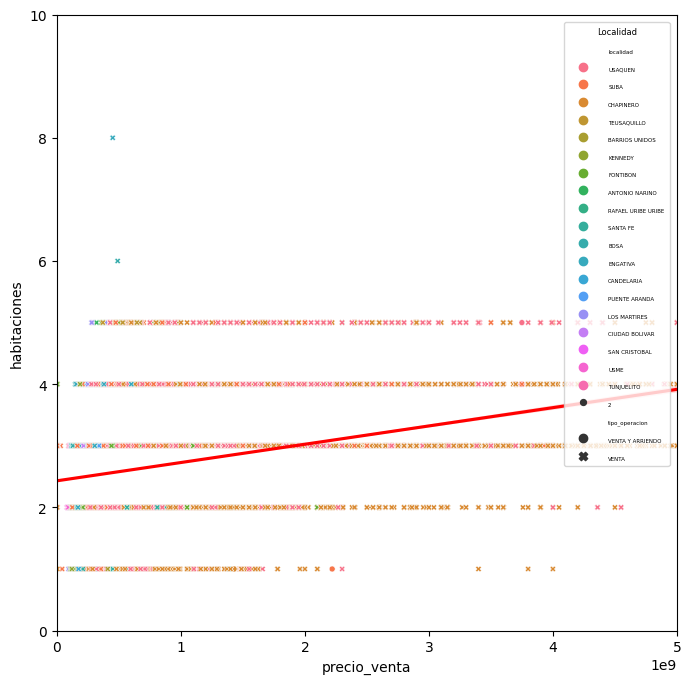

In [328]:
plt.figure(figsize=(8, 8))
fig = sns.scatterplot(data=df_ventas,
                x='precio_venta',
                y='habitaciones',
                size=2,
                style='tipo_operacion',
                hue='localidad',)

fig.set_xlim([0, 5000000000])
fig.set_ylim([0, 10])

legend = plt.legend(title='Localidad')
legend.get_title().set_fontsize(6)
sns.regplot(x='precio_venta',
                y='habitaciones', data=df_ventas, scatter_kws={'alpha': 0}, color='red')
for item in legend.texts:
    item.set_fontsize(4)

In [331]:
df_ventas['distancia_estacion_tm_m']

0        2798.74
1        1135.12
2        3138.91
3         936.00
4        2766.29
          ...   
62405    2279.90
62406    2336.00
62407    3115.76
62408    2654.00
62409    2987.26
Name: distancia_estacion_tm_m, Length: 43858, dtype: float64

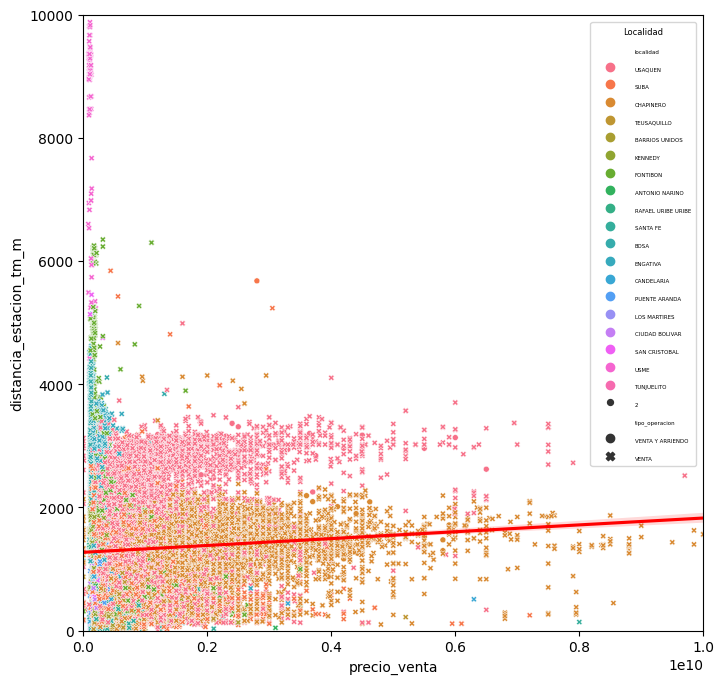

In [335]:
plt.figure(figsize=(8, 8))
fig = sns.scatterplot(data=df_ventas,
                x='precio_venta',
                y='distancia_estacion_tm_m',
                size=2,
                style='tipo_operacion',
                hue='localidad',)

fig.set_xlim([0, 10000000000])
fig.set_ylim([0, 10000])

legend = plt.legend(title='Localidad')
legend.get_title().set_fontsize(6)
sns.regplot(x='precio_venta',
                y='distancia_estacion_tm_m', data=df_ventas, scatter_kws={'alpha': 0}, color='red')
for item in legend.texts:
    item.set_fontsize(4)

In [264]:
correlacion_pearson_con_significancia(df_ventas['precio_venta'], df_ventas['habitaciones'])

Coeficiente de correlación de Pearson: 0.36
Las muestras están correlacionadas (rechazar H0) (p = 0.00)


In [260]:
correlacion_pearson_con_significancia(df_ventas['precio_venta'], df_ventas['distancia_estacion_tm_m'])

Coeficiente de correlación de Pearson: 0.06
Las muestras están correlacionadas (rechazar H0) (p = 0.00)


## 4.2.2 Correlaciones de precio del inmueble por localidad

Coeficientes de correlacion mas relevantes segun la localidad

In [ ]:
df_ventas['localidad'].value_counts().head(7)

USAQUEN        16470
CHAPINERO      11098
SUBA            7725
KENNEDY         1680
FONTIBON        1517
ENGATIVA        1291
TEUSAQUILLO     1192
Name: localidad, dtype: int64

In [283]:
df_ventas.query('localidad == "USAQUEN"').corr().sort_values(by="precio_venta", ascending = False)

<ipython-input-283-1f1ab6cbfb49>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ventas.query('localidad == "USAQUEN"').corr().sort_values(by="precio_venta", ascending = False)


,precio_venta,area,habitaciones,parqueaderos,estrato,longitud,latitud,jacuzzi,chimenea,gimnasio,ascensor,conjunto_cerrado,coords_modified,distancia_estacion_tm_m,is_cerca_estacion_tm
precio_venta,1.000000,0.432352,0.466984,0.677191,0.432763,0.106514,-0.313590,0.248741,0.278605,0.183904,0.082849,0.087540,0.024178,0.236310,-0.025136
parqueaderos,0.677191,0.352318,0.464013,1.000000,0.464754,-0.063416,-0.367678,0.176413,0.305384,0.142386,0.120392,0.042278,0.024153,0.070363,0.046658
habitaciones,0.466984,0.316572,1.000000,0.464013,0.125079,0.079005,-0.005064,0.131991,0.210470,-0.004936,-0.015344,0.084316,0.027963,0.094353,-0.006576
estrato,0.432763,0.209631,0.125079,0.464754,1.000000,-0.279369,-0.751974,0.061237,0.282790,0.015511,0.132945,-0.089545,0.019839,-0.029453,0.044531
area,0.432352,1.000000,0.316572,0.352318,0.209631,0.045454,-0.133557,0.121203,0.153288,0.045189,0.015028,0.039326,0.013751,0.101831,-0.013101
chimenea,0.278605,0.153288,0.210470,0.305384,0.282790,-0.041080,-0.239380,0.157891,1.000000,0.108905,0.228467,0.063188,0.010629,0.042555,0.008251
jacuzzi,0.248741,0.121203,0.131991,0.176413,0.061237,0.084053,-0.027583,1.000000,0.157891,0.159285,0.074304,0.105374,0.005143,0.102799,-0.027919
distancia_estacion_tm_m,0.236310,0.101831,0.094353,0.070363,-0.029453,0.941135,0.091896,0.102799,0.042555,0.155148,0.010641,0.159891,-0.092921,1.000000,-0.560630
gimnasio,0.183904,0.045189,-0.004936,0.142386,0.015511,0.163713,0.067469,0.159285,0.108905,1.000000,0.259322,0.226366,-0.013244,0.155148,-0.069316
longitud,0.106514,0.045454,0.079005,-0.063416,-0.279369,1.000000,0.415077,0.084053,-0.041080,0.163713,-0.032074,0.199277,-0.083498,0.941135,-0.541165


In [284]:
df_ventas.query('localidad == "CHAPINERO"').corr().sort_values(by="precio_venta", ascending = False)

<ipython-input-284-6985315f3392>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ventas.query('localidad == "CHAPINERO"').corr().sort_values(by="precio_venta", ascending = False)


,precio_venta,area,habitaciones,parqueaderos,estrato,longitud,latitud,jacuzzi,chimenea,gimnasio,ascensor,conjunto_cerrado,coords_modified,distancia_estacion_tm_m,is_cerca_estacion_tm
precio_venta,1.000000,0.631267,0.503808,0.650562,0.306398,0.346017,0.089106,0.183736,0.211114,0.223458,0.024334,0.060536,-0.012998,0.331583,-0.239704
parqueaderos,0.650562,0.532364,0.525214,1.000000,0.434951,0.402217,0.196281,0.152100,0.260233,0.181589,0.050933,0.043771,-0.024410,0.342174,-0.264422
area,0.631267,1.000000,0.546918,0.532364,0.265059,0.283201,0.059454,0.150331,0.201883,0.046503,-0.000592,0.017692,-0.003425,0.276715,-0.219300
habitaciones,0.503808,0.546918,1.000000,0.525214,0.297183,0.273859,0.108836,0.115092,0.245513,-0.019600,-0.015507,0.012929,0.000711,0.241224,-0.192052
longitud,0.346017,0.283201,0.273859,0.402217,0.589311,1.000000,0.441361,0.062223,0.193462,0.091663,0.011285,-0.000302,-0.014729,0.902513,-0.611299
distancia_estacion_tm_m,0.331583,0.276715,0.241224,0.342174,0.382165,0.902513,0.018178,0.058561,0.171310,0.080268,0.001210,0.007072,-0.042437,1.000000,-0.713157
estrato,0.306398,0.265059,0.297183,0.434951,1.000000,0.589311,0.531275,0.051175,0.233445,0.078087,0.025693,-0.010491,-0.046917,0.382165,-0.298756
gimnasio,0.223458,0.046503,-0.019600,0.181589,0.078087,0.091663,0.049317,0.122587,0.109558,1.000000,0.176890,0.159999,-0.011478,0.080268,-0.008125
chimenea,0.211114,0.201883,0.245513,0.260233,0.233445,0.193462,0.076663,0.109681,1.000000,0.109558,0.166739,0.037491,-0.023331,0.171310,-0.142028
jacuzzi,0.183736,0.150331,0.115092,0.152100,0.051175,0.062223,0.023296,1.000000,0.109681,0.122587,0.049797,0.067673,0.026427,0.058561,-0.011582


In [285]:
df_ventas.query('localidad == "SUBA"').corr().sort_values(by="precio_venta", ascending = False)

<ipython-input-285-aeda1e94d012>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ventas.query('localidad == "SUBA"').corr().sort_values(by="precio_venta", ascending = False)


,precio_venta,area,habitaciones,parqueaderos,estrato,longitud,latitud,jacuzzi,chimenea,gimnasio,ascensor,conjunto_cerrado,coords_modified,distancia_estacion_tm_m,is_cerca_estacion_tm
precio_venta,1.000000,0.311459,0.410221,0.746669,0.589447,-0.037055,-0.115327,0.260719,0.396532,0.261432,0.205481,0.110790,0.052078,-0.100448,0.083509
parqueaderos,0.746669,0.252590,0.366985,1.000000,0.646260,0.126533,-0.206965,0.225325,0.439363,0.281437,0.279993,0.128767,0.043405,-0.163996,0.095914
estrato,0.589447,0.199181,0.155956,0.646260,1.000000,0.193982,-0.415805,0.132142,0.390283,0.173445,0.251484,0.031869,0.050178,-0.237614,0.171732
habitaciones,0.410221,0.170299,1.000000,0.366985,0.155956,-0.109967,0.097040,0.113732,0.228517,0.136723,0.026508,0.112978,0.004948,0.086306,-0.091841
chimenea,0.396532,0.151761,0.228517,0.439363,0.390283,0.092268,-0.109631,0.267122,1.000000,0.276495,0.293012,0.177869,-0.008907,-0.023751,0.022984
area,0.311459,1.000000,0.170299,0.252590,0.199181,-0.031823,-0.046145,0.092592,0.151761,0.078969,0.055851,0.039163,0.016903,-0.049778,0.027334
gimnasio,0.261432,0.078969,0.136723,0.281437,0.173445,0.087123,0.108981,0.253939,0.276495,1.000000,0.432263,0.401839,-0.028923,0.114834,-0.087409
jacuzzi,0.260719,0.092592,0.113732,0.225325,0.132142,0.013992,0.052448,1.000000,0.267122,0.253939,0.171727,0.185991,-0.012939,0.038226,-0.034691
ascensor,0.205481,0.055851,0.026508,0.279993,0.251484,0.170769,-0.095752,0.171727,0.293012,0.432263,1.000000,0.293328,-0.011098,-0.027394,0.014492
conjunto_cerrado,0.110790,0.039163,0.112978,0.128767,0.031869,0.031769,0.133623,0.185991,0.177869,0.401839,0.293328,1.000000,-0.040606,0.088137,-0.080880


In [287]:
df_ventas.query('localidad == "KENNEDY"').corr().sort_values(by="precio_venta", ascending = False)

<ipython-input-287-3f0f21953853>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ventas.query('localidad == "KENNEDY"').corr().sort_values(by="precio_venta", ascending = False)


,precio_venta,area,habitaciones,parqueaderos,estrato,longitud,latitud,jacuzzi,chimenea,gimnasio,ascensor,conjunto_cerrado,coords_modified,distancia_estacion_tm_m,is_cerca_estacion_tm
precio_venta,1.000000,0.815076,0.350325,0.656142,0.627776,0.592656,-0.211176,0.041848,0.192031,0.280047,0.309001,0.042889,NaN,-0.208780,0.086965
area,0.815076,1.000000,0.484650,0.516854,0.439591,0.379963,-0.235351,0.031058,0.144212,0.168561,0.159764,-0.012975,NaN,-0.185028,0.110873
parqueaderos,0.656142,0.516854,0.219152,1.000000,0.515242,0.448474,-0.050053,0.047058,0.114523,0.304142,0.357344,0.127224,NaN,-0.086420,0.046614
estrato,0.627776,0.439591,0.169630,0.515242,1.000000,0.718736,-0.264357,0.052359,0.154493,0.251598,0.283216,0.005994,NaN,-0.173823,0.105861
longitud,0.592656,0.379963,0.174875,0.448474,0.718736,1.000000,-0.264757,0.040346,0.124597,0.226484,0.176758,0.054226,NaN,-0.160138,0.073664
habitaciones,0.350325,0.484650,1.000000,0.219152,0.169630,0.174875,-0.098860,0.031677,0.058469,0.051294,0.022770,0.006418,NaN,-0.165823,0.124312
ascensor,0.309001,0.159764,0.022770,0.357344,0.283216,0.176758,0.040627,0.089395,0.150580,0.407663,1.000000,0.277722,NaN,-0.032591,0.025041
gimnasio,0.280047,0.168561,0.051294,0.304142,0.251598,0.226484,0.007934,0.148297,0.199788,1.000000,0.407663,0.259401,NaN,-0.099333,0.024112
chimenea,0.192031,0.144212,0.058469,0.114523,0.154493,0.124597,-0.055523,0.354065,1.000000,0.199788,0.150580,0.054880,NaN,-0.063166,0.007776
is_cerca_estacion_tm,0.086965,0.110873,0.124312,0.046614,0.105861,0.073664,-0.223326,0.016912,0.007776,0.024112,0.025041,0.032637,NaN,-0.592654,1.000000


In [288]:
df_ventas.query('localidad == "FONTIBON"').corr().sort_values(by="precio_venta", ascending = False)

<ipython-input-288-9e4d34637397>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ventas.query('localidad == "FONTIBON"').corr().sort_values(by="precio_venta", ascending = False)


,precio_venta,area,habitaciones,parqueaderos,estrato,longitud,latitud,jacuzzi,chimenea,gimnasio,ascensor,conjunto_cerrado,coords_modified,distancia_estacion_tm_m,is_cerca_estacion_tm
precio_venta,1.000000,0.167248,0.316214,0.775601,0.599141,0.567435,-0.433759,0.297903,0.392584,0.312276,0.262635,0.152710,NaN,-0.528722,0.350681
parqueaderos,0.775601,0.158132,0.313743,1.000000,0.623862,0.585901,-0.508494,0.219546,0.340445,0.322593,0.274608,0.200858,NaN,-0.565289,0.283041
estrato,0.599141,0.065282,0.087646,0.623862,1.000000,0.739147,-0.607976,0.146260,0.271199,0.304178,0.280799,0.196280,NaN,-0.698256,0.321662
longitud,0.567435,0.077757,0.080993,0.585901,0.739147,1.000000,-0.823394,0.115632,0.250703,0.196094,0.170924,0.162754,NaN,-0.972442,0.428962
chimenea,0.392584,0.060138,0.145984,0.340445,0.271199,0.250703,-0.194725,0.256343,1.000000,0.184557,0.166618,0.094299,NaN,-0.225814,0.080664
is_cerca_estacion_tm,0.350681,0.047720,0.077352,0.283041,0.321662,0.428962,-0.187091,0.071781,0.080664,0.102284,0.043427,0.077374,NaN,-0.423828,1.000000
habitaciones,0.316214,0.108615,1.000000,0.313743,0.087646,0.080993,0.015866,0.076673,0.145984,0.021083,-0.002171,0.021074,NaN,-0.082742,0.077352
gimnasio,0.312276,0.014950,0.021083,0.322593,0.304178,0.196094,-0.218679,0.210569,0.184557,1.000000,0.407475,0.355416,NaN,-0.167252,0.102284
jacuzzi,0.297903,0.054886,0.076673,0.219546,0.146260,0.115632,-0.097553,1.000000,0.256343,0.210569,0.124641,0.052076,NaN,-0.104651,0.071781
ascensor,0.262635,0.068903,-0.002171,0.274608,0.280799,0.170924,-0.226665,0.124641,0.166618,0.407475,1.000000,0.350826,NaN,-0.130762,0.043427


In [289]:
df_ventas.query('localidad == "ENGATIVA"').corr().sort_values(by="precio_venta", ascending = False)

<ipython-input-289-bccd4dd66edf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ventas.query('localidad == "ENGATIVA"').corr().sort_values(by="precio_venta", ascending = False)


,precio_venta,area,habitaciones,parqueaderos,estrato,longitud,latitud,jacuzzi,chimenea,gimnasio,ascensor,conjunto_cerrado,coords_modified,distancia_estacion_tm_m,is_cerca_estacion_tm
precio_venta,1.000000,0.814227,0.191175,0.585105,0.593175,0.221480,-0.284314,0.105388,0.289896,0.178723,0.286391,-0.007859,NaN,-0.238748,0.222452
area,0.814227,1.000000,0.429009,0.505120,0.473572,0.107357,-0.114779,0.045433,0.266143,0.110745,0.160934,-0.010487,NaN,-0.103308,0.082676
estrato,0.593175,0.473572,0.110534,0.502843,1.000000,0.078022,-0.156926,0.038036,0.154512,0.266188,0.391190,0.021968,NaN,-0.043342,0.091510
parqueaderos,0.585105,0.505120,0.137206,1.000000,0.502843,0.100401,-0.159284,0.037968,0.122255,0.258857,0.379768,0.074468,NaN,-0.076678,0.138705
chimenea,0.289896,0.266143,0.092542,0.122255,0.154512,0.036889,-0.091699,0.270867,1.000000,0.168801,0.171443,0.089975,NaN,-0.021605,-0.033871
ascensor,0.286391,0.160934,-0.025350,0.379768,0.391190,-0.076687,-0.035700,0.105319,0.171443,0.480322,1.000000,0.287608,NaN,0.109611,0.070932
is_cerca_estacion_tm,0.222452,0.082676,-0.142467,0.138705,0.091510,0.430980,-0.302636,0.035096,-0.033871,0.062427,0.070932,-0.005128,NaN,-0.628003,1.000000
longitud,0.221480,0.107357,-0.135054,0.100401,0.078022,1.000000,-0.692095,-0.001584,0.036889,-0.086406,-0.076687,-0.025097,NaN,-0.832747,0.430980
habitaciones,0.191175,0.429009,1.000000,0.137206,0.110534,-0.135054,0.194414,-0.023647,0.092542,0.018446,-0.025350,-0.018653,NaN,0.150115,-0.142467
gimnasio,0.178723,0.110745,0.018446,0.258857,0.266188,-0.086406,0.064542,0.184808,0.168801,1.000000,0.480322,0.276284,NaN,0.110228,0.062427


In [291]:
df_ventas.query('localidad == "TEUSAQUILLO"').corr().sort_values(by="precio_venta", ascending = False)

<ipython-input-291-baf52e9181ea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ventas.query('localidad == "TEUSAQUILLO"').corr().sort_values(by="precio_venta", ascending = False)


,precio_venta,area,habitaciones,parqueaderos,estrato,longitud,latitud,jacuzzi,chimenea,gimnasio,ascensor,conjunto_cerrado,coords_modified,distancia_estacion_tm_m,is_cerca_estacion_tm
precio_venta,1.000000,0.740735,0.457607,0.669586,0.414884,-0.382603,0.141526,0.218140,0.282111,0.210705,0.179958,0.199035,NaN,0.212037,-0.204021
area,0.740735,1.000000,0.711534,0.507935,0.364772,-0.224398,0.130029,0.165477,0.308394,-0.050950,-0.041443,0.078013,NaN,0.212288,-0.204779
parqueaderos,0.669586,0.507935,0.374752,1.000000,0.403648,-0.392062,0.212617,0.186832,0.214772,0.191017,0.188120,0.175182,NaN,0.193975,-0.183867
habitaciones,0.457607,0.711534,1.000000,0.374752,0.284542,-0.335806,0.139170,0.103905,0.184674,-0.100805,-0.088868,0.113358,NaN,0.278079,-0.241178
estrato,0.414884,0.364772,0.284542,0.403648,1.000000,-0.273744,0.297690,0.029269,0.223899,-0.005930,0.099052,0.023221,NaN,0.206259,-0.220680
chimenea,0.282111,0.308394,0.184674,0.214772,0.223899,-0.083997,0.135492,0.102307,1.000000,0.006036,0.139933,0.053940,NaN,0.136836,-0.130398
jacuzzi,0.218140,0.165477,0.103905,0.186832,0.029269,-0.067487,0.044252,1.000000,0.102307,0.064354,0.012945,0.058356,NaN,0.042801,-0.046710
distancia_estacion_tm_m,0.212037,0.212288,0.278079,0.193975,0.206259,-0.452143,0.279584,0.042801,0.136836,0.147315,0.060649,0.185153,NaN,1.000000,-0.829289
gimnasio,0.210705,-0.050950,-0.100805,0.191017,-0.005930,-0.306805,-0.067248,0.064354,0.006036,1.000000,0.355159,0.363596,NaN,0.147315,-0.120282
conjunto_cerrado,0.199035,0.078013,0.113358,0.175182,0.023221,-0.363383,0.005319,0.058356,0.053940,0.363596,0.263947,1.000000,NaN,0.185153,-0.110542


# Visualización de información